#RF Section

## RF Default 10 years MAE -

In [ ]:
#Import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Download the historical stock data for the past 10 years
data = yf.download('BP.L', start='2013-01-01', end='2023-01-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,429.250000,433.579987,426.500000,431.299988,218.564911,17136180
2013-01-03,435.000000,444.000000,431.899994,441.700012,223.835297,25383320
2013-01-04,448.500000,454.600006,444.149994,453.500000,229.815033,36090932
2013-01-07,452.600006,452.950012,447.399994,448.750000,227.407974,18736810
2013-01-08,446.200012,451.779999,445.799988,448.950012,227.509201,17980552


In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-22,482.100006,485.066010,476.500000,477.899994,438.207642,57397378
2022-12-23,475.000000,478.899994,473.750000,478.899994,439.124603,62024066
2022-12-28,487.750000,489.950012,477.250000,480.399994,440.499969,61058866
2022-12-29,474.200012,480.850006,472.799988,480.750000,440.820984,15838786
2022-12-30,478.450012,480.500000,474.899994,474.899994,435.456787,12498129


In [ ]:
print(data.describe())

              Open         High          Low        Close    Adj Close  \
count  2522.000000  2522.000000  2522.000000  2522.000000  2522.000000   
mean    432.520973   437.272580   427.492550   432.341151   296.870455   
std      83.951337    83.363944    84.754497    83.830836    67.616172   
min     191.559998   194.699997     4.686000   193.440002   158.540710   
25%     367.450005   376.012497   362.311989   368.399994   242.062302   
50%     451.000000   455.199997   446.645004   451.024994   275.416794   
75%     489.700012   493.662506   485.698761   489.350006   355.276337   
max     602.000000   603.200012   595.400024   598.299988   456.179749   

             Volume  
count  2.522000e+03  
mean   3.980003e+07  
std    2.242059e+07  
min    0.000000e+00  
25%    2.592270e+07  
50%    3.440970e+07  
75%    4.778073e+07  
max    2.574570e+08  


In [ ]:
data = data.drop('Adj Close', axis=1)

In [ ]:
print(data.describe())

              Open         High          Low        Close        Volume
count  2522.000000  2522.000000  2522.000000  2522.000000  2.522000e+03
mean    432.520973   437.272580   427.492550   432.341151  3.980003e+07
std      83.951337    83.363944    84.754497    83.830836  2.242059e+07
min     191.559998   194.699997     4.686000   193.440002  0.000000e+00
25%     367.450005   376.012497   362.311989   368.399994  2.592270e+07
50%     451.000000   455.199997   446.645004   451.024994  3.440970e+07
75%     489.700012   493.662506   485.698761   489.350006  4.778073e+07
max     602.000000   603.200012   595.400024   598.299988  2.574570e+08


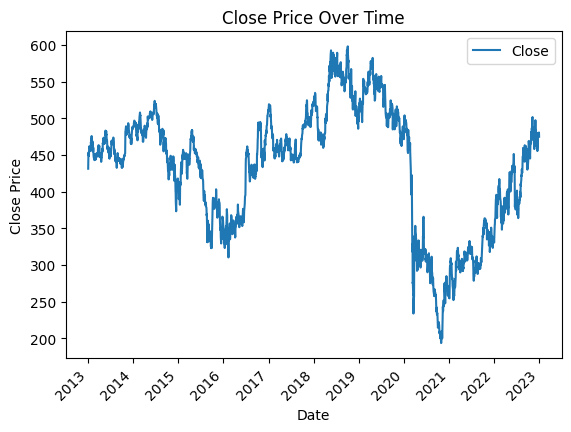

In [ ]:
# Plot the 'Close' price
data.plot(y='Close', use_index=True)

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Over Time')
plt.show()

In [ ]:
# Data preprocess

# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close'] #Target feature

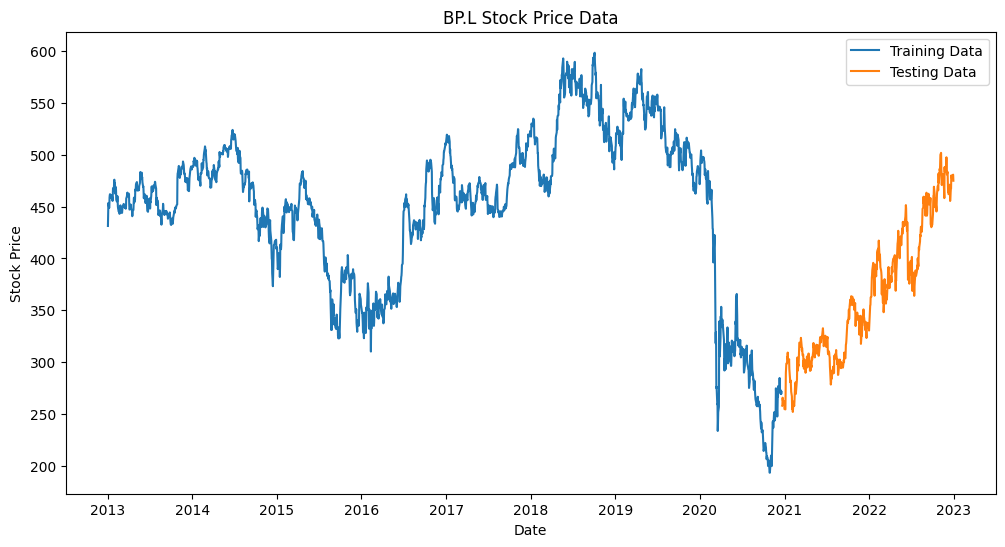

In [ ]:
# Split the data into training and testing sets 80/20
train_data = data.iloc[:int(len(data)*0.8)]
test_data = data.iloc[int(len(data)*0.8):]

# Visualise the training and testing data
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Close'], label='Training Data')
plt.plot(test_data.index, test_data['Close'], label='Testing Data')
plt.title('BP.L Stock Price Data')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
# Checking date range for training data
print("Training data date range:")
print(train_data.index.min(), "to", train_data.index.max())

# Checking date range for testing data
print("\nTesting data date range:")
print(test_data.index.min(), "to", test_data.index.max())

Training data date range:
2013-01-02 00:00:00 to 2020-12-18 00:00:00

Testing data date range:
2020-12-21 00:00:00 to 2022-12-30 00:00:00


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
predictions = rf.predict(X_test)
print('The model score is:' , rf.score(X, y))

The model score is: 0.9974994152222163


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
MAE = mean_absolute_error(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, predictions)

In [ ]:
print("Mean Squared Error (MSE): {:.2f}".format(MSE))
print("Root Mean Squared Error (RMSE): {:.2f}".format(RMSE))
print("Mean Absolute Error (MAE): {:.2f}".format(MAE))
print("R² Score:", r2)

Mean Squared Error (MSE): 79.11
Root Mean Squared Error (RMSE): 8.89
Mean Absolute Error (MAE): 2.99
R² Score: 0.9892745275250036


## RF Default 5 years MAE -

In [ ]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Download the historical stock data for the past 5 years
data = yf.download('BP.L', start='2018-01-01', end='2023-01-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,524.200012,524.299988,514.299988,517.500000,355.833954,20152548
2018-01-03,519.200012,525.599976,518.799988,524.200012,360.440948,27207749
2018-01-04,529.099976,530.599976,527.200012,530.000000,364.428986,32592520
2018-01-05,530.000000,531.299988,526.700012,529.599976,364.153931,24779506
2018-01-08,529.400024,530.299988,526.900024,527.400024,362.641266,29326873


In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-22,482.100006,485.066010,476.500000,477.899994,438.207672,57397378
2022-12-23,475.000000,478.899994,473.750000,478.899994,439.124573,62024066
2022-12-28,487.750000,489.950012,477.250000,480.399994,440.500000,61058866
2022-12-29,474.200012,480.850006,472.799988,480.750000,440.820923,15838786
2022-12-30,478.450012,480.500000,474.899994,474.899994,435.456848,12498129


In [ ]:
print(data.describe())

              Open         High          Low        Close    Adj Close  \
count  1258.000000  1258.000000  1258.000000  1258.000000  1258.000000   
mean    421.269976   426.711689   415.747163   421.116190   333.775818   
std     108.028302   107.492718   108.660555   107.783358    71.510707   
min     191.559998   194.699997     4.686000   193.440002   158.540710   
25%     315.012497   320.284500   309.375008   315.037498   264.146843   
50%     443.599991   452.449997   436.350006   442.350006   354.630692   
75%     517.799988   523.000000   513.274994   516.500000   394.443558   
max     602.000000   603.200012   595.400024   598.299988   456.179749   

             Volume  
count  1.258000e+03  
mean   4.926368e+07  
std    2.551567e+07  
min    6.020955e+06  
25%    3.289442e+07  
50%    4.278486e+07  
75%    5.915502e+07  
max    2.574570e+08  


In [ ]:
data = data.drop('Adj Close', axis=1)

In [ ]:
print(data.describe())

              Open         High          Low        Close        Volume
count  1258.000000  1258.000000  1258.000000  1258.000000  1.258000e+03
mean    421.269976   426.711689   415.747163   421.116190  4.926368e+07
std     108.028302   107.492718   108.660555   107.783358  2.551567e+07
min     191.559998   194.699997     4.686000   193.440002  6.020955e+06
25%     315.012497   320.284500   309.375008   315.037498  3.289442e+07
50%     443.599991   452.449997   436.350006   442.350006  4.278486e+07
75%     517.799988   523.000000   513.274994   516.500000  5.915502e+07
max     602.000000   603.200012   595.400024   598.299988  2.574570e+08


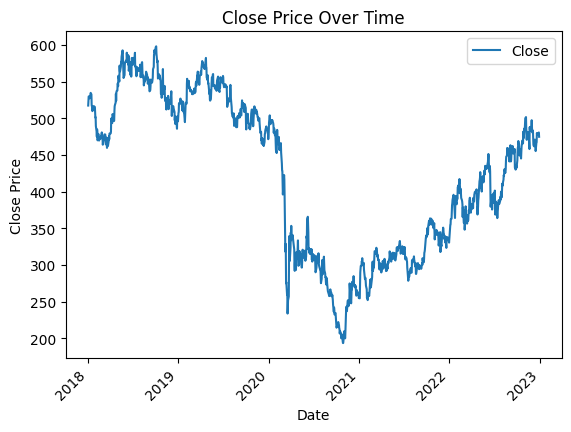

In [ ]:
# Plot the 'Close' price
data.plot(y='Close', use_index=True)

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Over Time')
plt.show()

In [ ]:
# Data preprocess

# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close'] #Target feature

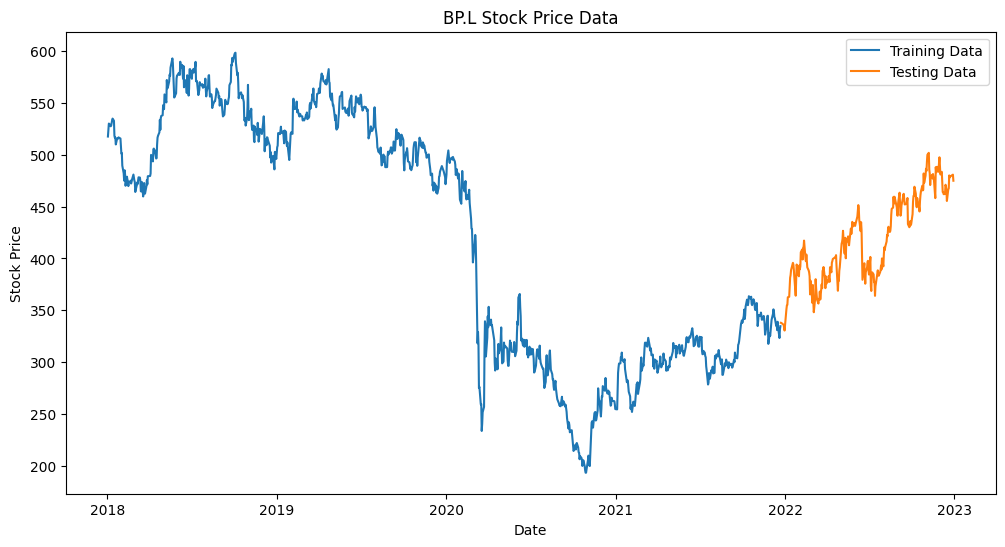

In [ ]:
# Split the data into training and testing sets
train_data = data.iloc[:int(len(data)*0.8)]
test_data = data.iloc[int(len(data)*0.8):]

# Create a graph to visualise the training and testing data
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Close'], label='Training Data')
plt.plot(test_data.index, test_data['Close'], label='Testing Data')
plt.title('BP.L Stock Price Data')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
# Checking date range for training data
print("Training data date range:")
print(train_data.index.min(), "to", train_data.index.max())

# Checking date range for testing data
print("\nTesting data date range:")
print(test_data.index.min(), "to", test_data.index.max())

Training data date range:
2018-01-02 00:00:00 to 2021-12-22 00:00:00

Testing data date range:
2021-12-23 00:00:00 to 2022-12-30 00:00:00


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
predictions = rf.predict(X_test)
print('The model score is:' , rf.score(X, y))

The model score is: 0.9990846610209998


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate R² score
r2 = r2_score(y_test, predictions)
# Calculate evaluation metrics
MAE = mean_absolute_error(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)

In [ ]:
print("Mean Absolute Error (MAE): {:.2f}".format(MAE))
print("Mean Squared Error (MSE): {:.2f}".format(MSE))
print("Root Mean Squared Error (RMSE): {:.2f}".format(RMSE))
print("R² Score:", r2)

Mean Absolute Error (MAE): 2.91
Mean Squared Error (MSE): 13.88
Root Mean Squared Error (RMSE): 3.73
R² Score: 0.9987617791384744


## RF Feature Engineering  MAE -

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import make_scorer
from sklearn.preprocessing import FunctionTransformer

# Download data
data = yf.download('BP.L', start='2016-01-01', end='2023-01-01') # 7 years

# Feature engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

delta = data['Close'].diff()
up = delta.clip(lower=0)
down = -1 * delta.clip(upper=0)
ema_up = up.ewm(com=13, adjust=False).mean()
ema_down = down.ewm(com=13, adjust=False).mean()
rs = ema_up / ema_down
data['RSI'] = 100 - (100 / (1 + rs))

# Lagged features
for i in range(1, 6):  # Create 5 lagged features
    data[f'Lagged_Close_{i}'] = data['Close'].shift(i)

data = data.dropna()

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare data
X = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'RSI',
          'Lagged_Close_1', 'Lagged_Close_2', 'Lagged_Close_3', 'Lagged_Close_4', 'Lagged_Close_5']]
y = data['Close']

# Split data into training/validation/testing sets (70/15/15)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Create and fit the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predictions and evaluations
for dataset_name, X_data, y_data in [('Validation', X_val, y_val), ('Test', X_test, y_test)]:
    y_pred = model.predict(X_data)

    mae = mean_absolute_error(y_data, y_pred)
    mse = mean_squared_error(y_data, y_pred)
    rmse = mean_squared_error(y_data, y_pred, squared=False)
    r2 = r2_score(y_data, y_pred)

    print(f"\n{dataset_name} Set Metrics:")
    print("-" * 40)
    print(f"{'Mean Absolute Error (MAE)':<35}: {mae:.4f}")
    print(f"{'Mean Squared Error (MSE)':<35}: {mse:.4f}")
    print(f"{'Root Mean Squared Error (RMSE)':<35}: {rmse:.4f}")
    print(f"{'R-squared (R2)':<35}: {r2:.4f}")


Validation Set Metrics:
----------------------------------------
Mean Absolute Error (MAE)          : 2.7426
Mean Squared Error (MSE)           : 14.1681
Root Mean Squared Error (RMSE)     : 3.7641
R-squared (R2)                     : 0.9986

Test Set Metrics:
----------------------------------------
Mean Absolute Error (MAE)          : 3.7445
Mean Squared Error (MSE)           : 158.1279
Root Mean Squared Error (RMSE)     : 12.5749
R-squared (R2)                     : 0.9849


## RF Hypertuning - MAE -

K-fold cross vaildation/ Regularization / Ensemble method - bagging

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Download historical stock data for BP for 2018-2023
data = yf.download('BP.L', start='2018-01-01', end='2023-01-01')

# Prepare the feature matrix (X) and target vector (y)
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 4, 6],
}

# Initialise K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in kf.split(X_train):
    X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

    # Create a Random Forest Regressor model
    rf = RandomForestRegressor(random_state=42, max_depth=10, min_samples_split=10, min_samples_leaf=4)

    # Perform Grid Search Cross-Validation to find the best hyperparameters
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
    grid_search.fit(X_tr, y_tr)

    best_rf = grid_search.best_estimator_
    y_pred = best_rf.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    print(f"Mean Squared Error (MSE) for this fold: {mse:.2f}")

best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

print("Best Hyperparameters:", grid_search.best_params_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Mean Squared Error (MSE) for this fold: 23.88
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Mean Squared Error (MSE) for this fold: 15.45
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Mean Squared Error (MSE) for this fold: 138.43
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Mean Squared Error (MSE) for this fold: 18.37
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Mean Squared Error (MSE) for this fold: 120.31
Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"\nMean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print("R² Score:", r2)


Mean Absolute Error (MAE): 2.89
Mean Squared Error (MSE): 13.75
Root Mean Squared Error (RMSE): 3.71
R² Score: 0.9987739513044864


## RF Combine 1 - MAE

In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Download historical stock data for BP for the past 5 years
data = yf.download('BP.L', start='2018-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Volatility Measures - Standard Deviation
data['Volatility_30d'] = data['Close'].rolling(window=30).std()

# Momentum Indicators - Relative Strength Index (RSI)
def compute_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = compute_rsi(data)

# Lag Features - Using lagged closing prices
for t in range(1, 6):
    data[f'lag_{t}'] = data['Close'].shift(t)  # Creating lagged features for 1 to 5 days

# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'Volatility_30d', 'RSI', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']].dropna()
y = data['Close']  # Extract the 'Close' column for the target variable

[*********************100%***********************]  1 of 1 completed


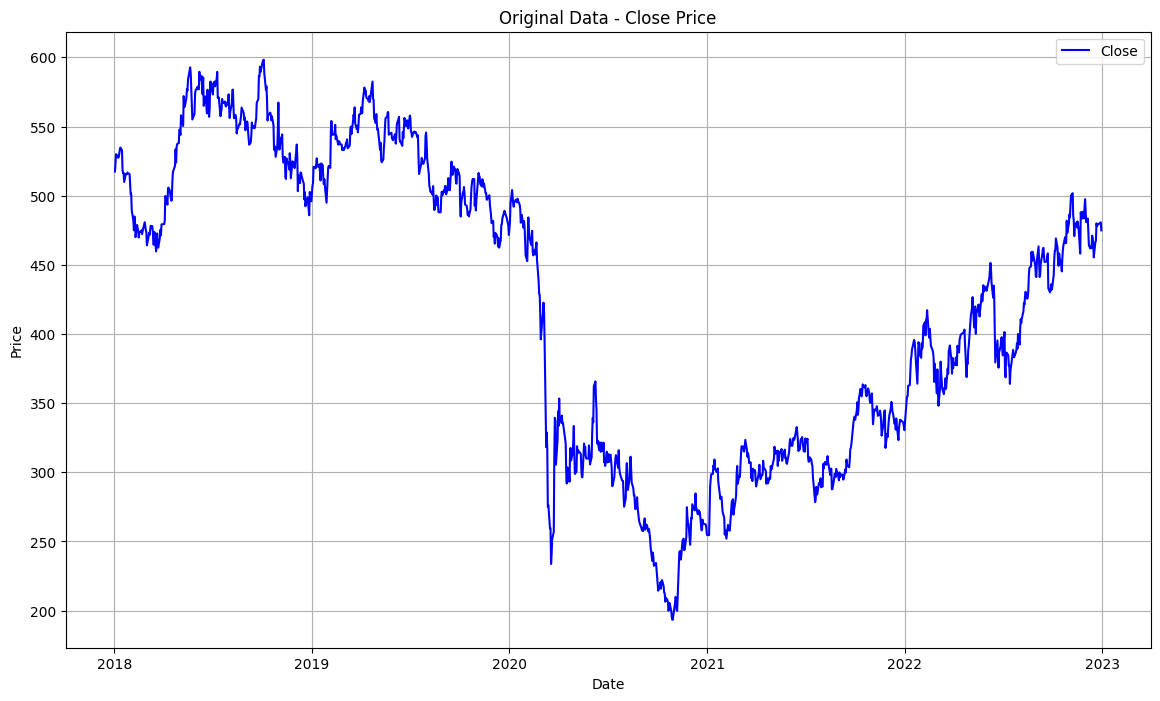

In [ ]:
import matplotlib.pyplot as plt

# Create a line chart with the original 'Close' data
plt.figure(figsize=(14, 8))
plt.plot(data['Close'], label='Close', color='b')
plt.title('Original Data - Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

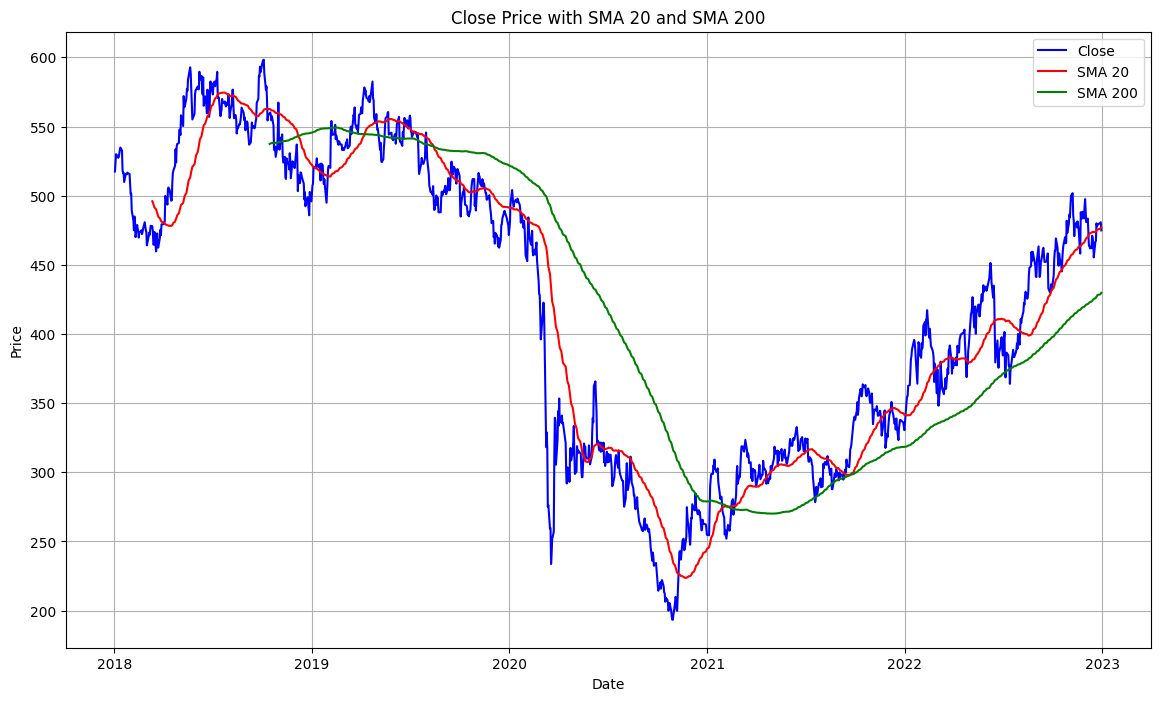

In [ ]:
# Create a line chart with SMA 50 and SMA 200 overlaid
plt.figure(figsize=(14, 8))
plt.plot(data['Close'], label='Close', color='b')
plt.plot(data['SMA_20'], label='SMA 20', color='r')
plt.plot(data['SMA_200'], label='SMA 200', color='g')
plt.title('Close Price with SMA 20 and SMA 200')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

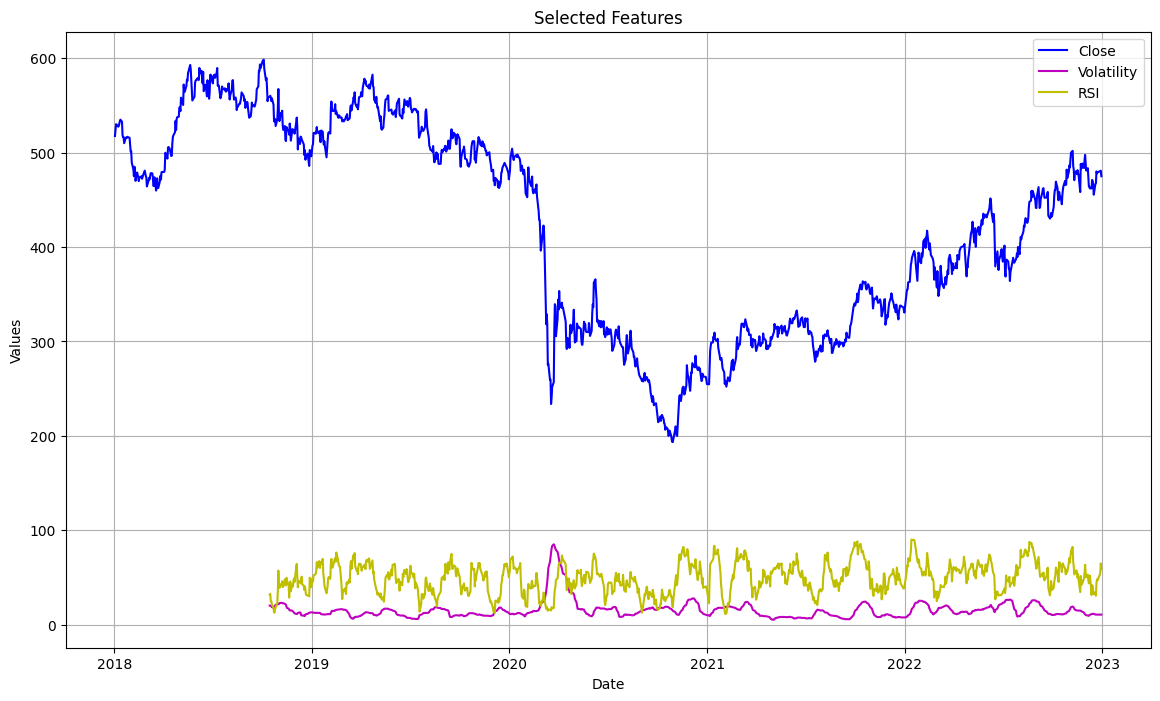

In [ ]:
import matplotlib.pyplot as plt

# Create a line chart for the selected features
plt.figure(figsize=(14, 8))

plt.plot(data['Close'], label='Close', color='b')
plt.plot(X.index, X['Volatility_30d'], label='Volatility', color='m')
plt.plot(X.index, X['RSI'], label='RSI', color='y')

plt.title('Selected Features')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Drop missing values from both X and y
data_cleaned = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'Volatility_30d', 'RSI', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'Close']].dropna()

# Split the data into features (X) and target variable (y)
X = data_cleaned[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'Volatility_30d', 'RSI', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = data_cleaned['Close']

In [ ]:
# Split the data into training, validation, and testing sets (70/15/15 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15/(0.85), shuffle=False)

# Create a pipeline to handle missing values and model training
pipeline = make_pipeline(SimpleImputer(strategy='mean'), RandomForestRegressor(random_state=42))

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'randomforestregressor__n_estimators': [50, 100, 200],
    'randomforestregressor__max_features': ['sqrt', 'log2', None],
    'randomforestregressor__max_depth': [None, 10, 20, 30],
    'randomforestregressor__min_samples_split': [2, 5, 10],
    'randomforestregressor__min_samples_leaf': [1, 2, 4]
}

# Initialise GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid,
                           cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2,
                           error_score='raise')

# Start timer for fitting the grid search
start_time = time.time()

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# End timer for fitting the grid search
end_time = time.time()

# Calculate duration
fit_duration = end_time - start_time
print(f"Time taken for GridSearchCV fitting: {fit_duration:.2f} seconds")

# Retrieve the best pipeline with the best parameters
best_pipeline = grid_search.best_estimator_

# Make predictions on the validation set
y_val_pred = best_pipeline.predict(X_val)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Time taken for GridSearchCV fitting: 311.54 seconds


In [ ]:
# Evaluate the model on the validation set
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = val_mse ** 0.5
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation Mean Absolute Error (MAE): {val_mae:.2f}")
print(f"Validation Mean Squared Error (MSE): {val_mse:.2f}")
print(f"Validation Root Mean Squared Error (RMSE): {val_rmse:.2f}")
print(f"Validation R-squared (R2): {val_r2:.2f}")

# Make predictions on the test set
y_test_pred = best_pipeline.predict(X_test)

# Evaluate the model on the test set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = test_mse ** 0.5
test_r2 = r2_score(y_test, y_test_pred)

print(f"\nTest Mean Absolute Error (MAE): {test_mae:.2f}")
print(f"Test Mean Squared Error (MSE): {test_mse:.2f}")
print(f"Test Root Mean Squared Error (RMSE): {test_rmse:.2f}")
print(f"Test R-squared (R2): {test_r2:.2f}")

# Print the best parameters found during tuning
print(f"\nBest parameters from GridSearchCV: {grid_search.best_params_}")

Validation Mean Absolute Error (MAE): 7.83
Validation Mean Squared Error (MSE): 111.79
Validation Root Mean Squared Error (RMSE): 10.57
Validation R-squared (R2): 0.84

Test Mean Absolute Error (MAE): 21.60
Test Mean Squared Error (MSE): 544.22
Test Root Mean Squared Error (RMSE): 23.33
Test R-squared (R2): 0.55

Best parameters from GridSearchCV: {'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': None, 'randomforestregressor__min_samples_leaf': 2, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__n_estimators': 200}


## RF Combine 2 - MAE

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Download historical stock data for BP from 2016 to 2023
data = yf.download('BP.L', start='2016-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()
data['Volatility_30d'] = data['Close'].rolling(window=30).std()

# Momentum Indicators - Relative Strength Index (RSI)
def compute_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = compute_rsi(data)

# Lag Features for 1 to 5 days
for t in range(1, 6):
    data[f'lag_{t}'] = data['Close'].shift(t)

# Prepare the data by dropping rows with NA values
data_cleaned = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200',
                      'Volatility_30d', 'RSI', 'lag_1', 'lag_2', 'lag_3',
                      'lag_4', 'lag_5', 'Close']].dropna()

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Split features and target variable
X = data_cleaned[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200',
                   'Volatility_30d', 'RSI', 'lag_1', 'lag_2', 'lag_3',
                   'lag_4', 'lag_5']]
y = data_cleaned['Close']

# Split the data into training, validation, and test sets (80/10/10)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

In [ ]:
# Create a Random Forest Regressor model
rf = RandomForestRegressor(random_state=42)

# Create a pipeline to handle missing values and the model
pipeline = make_pipeline(SimpleImputer(strategy='mean'), rf)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'randomforestregressor__n_estimators': [50, 100, 200],
    'randomforestregressor__max_features': [None, 'sqrt', 'log2'],
    'randomforestregressor__max_depth': [None, 10, 20, 30],
    'randomforestregressor__min_samples_split': [2, 5, 10],
    'randomforestregressor__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print best parameters
print(f"Best parameters found: {grid_search.best_params_}")

# Best model from grid search
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found: {'randomforestregressor__max_depth': 20, 'randomforestregressor__max_features': 'sqrt', 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__n_estimators': 50}



Validation Mean Absolute Error (MAE): 13.79
Validation Mean Squared Error (MSE): 259.83
Validation Root Mean Squared Error (RMSE): 16.12
Validation R-squared (R2): 0.61

Test Mean Absolute Error (MAE): 11.21
Test Mean Squared Error (MSE): 207.92
Test Root Mean Squared Error (RMSE): 14.42
Test R-squared (R2): 0.83


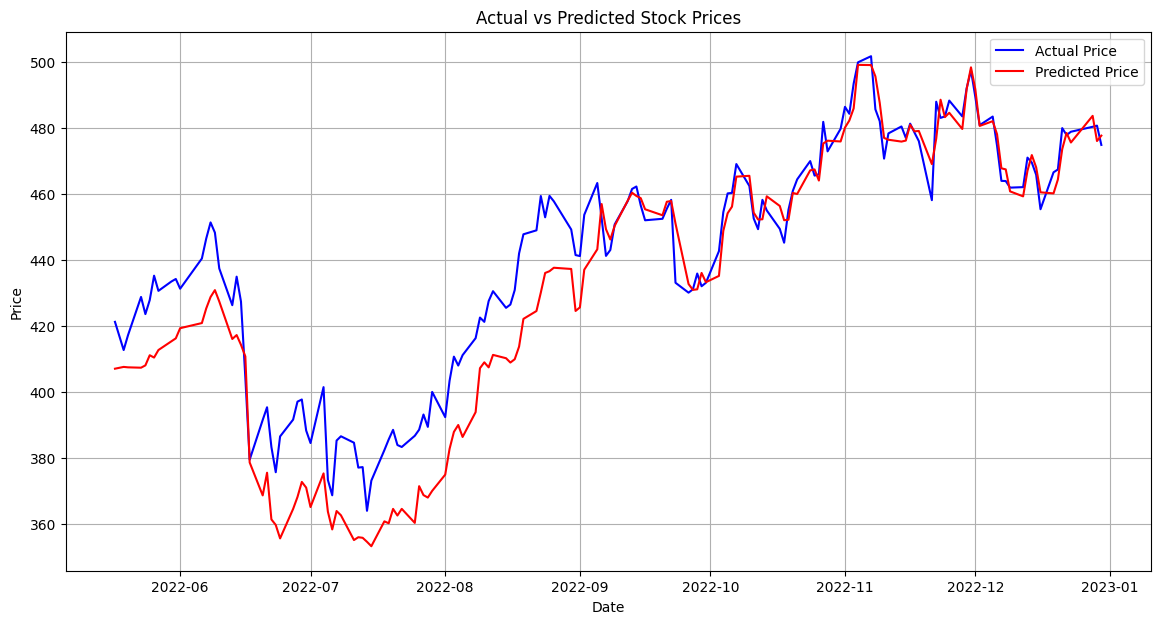

In [ ]:
# Make predictions on the validation set
y_val_pred = best_model.predict(X_val)

# Evaluate the model on the validation set
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = val_mse ** 0.5
val_r2 = r2_score(y_val, y_val_pred)

print(f"\nValidation Mean Absolute Error (MAE): {val_mae:.2f}")
print(f"Validation Mean Squared Error (MSE): {val_mse:.2f}")
print(f"Validation Root Mean Squared Error (RMSE): {val_rmse:.2f}")
print(f"Validation R-squared (R2): {val_r2:.2f}")

# Make predictions on the test set
y_test_pred = best_model.predict(X_test)

# Evaluate the model on the test set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = test_mse ** 0.5
test_r2 = r2_score(y_test, y_test_pred)

print(f"\nTest Mean Absolute Error (MAE): {test_mae:.2f}")
print(f"Test Mean Squared Error (MSE): {test_mse:.2f}")
print(f"Test Root Mean Squared Error (RMSE): {test_rmse:.2f}")
print(f"Test R-squared (R2): {test_r2:.2f}")

# Visualise the predictions
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Price', color='b')
plt.plot(y_test.index, y_test_pred, label='Predicted Price', color='r')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

## RF Combine 3 - MAE

In [ ]:
import time
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Start timer for data download
start_time = time.time()
# Download historical stock data for BP from 2016 to 2023
data = yf.download('BP.L', start='2016-01-01', end='2023-01-01')
print(f"Time taken to download data: {time.time() - start_time:.2f} seconds")

# Start timer for feature engineering
start_time = time.time()
# Feature Engineering
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()
data['Volatility_30d'] = data['Close'].rolling(window=30).std()

# Function to compute the Relative Strength Index
def compute_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate RSI
data['RSI'] = compute_rsi(data)

# Function to compute the Moving Average Convergence Divergence
def compute_macd(data, short_window=12, long_window=26):
    exp1 = data['Close'].ewm(span=short_window, adjust=False).mean()
    exp2 = data['Close'].ewm(span=long_window, adjust=False).mean()
    return exp1 - exp2

# Calculate MACD
data['MACD'] = compute_macd(data)

# Calculate Bollinger Bands
data['Bollinger_High'] = data['Close'].rolling(window=20).mean() + (data['Close'].rolling(window=20).std() * 2)
data['Bollinger_Low'] = data['Close'].rolling(window=20).mean() - (data['Close'].rolling(window=20).std() * 2)

# Creating lag features
for t in range(1, 6):
    data[f'lag_{t}'] = data['Close'].shift(t)

# Clean the data
data_cleaned = data[['Open', 'High', 'Low', 'Volume', 'SMA_50', 'SMA_200', 'Volatility_30d', 'RSI', 'MACD',
                      'Bollinger_High', 'Bollinger_Low', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'Close']].dropna()
print(f"Time taken for feature engineering: {time.time() - start_time:.2f} seconds")

[*********************100%***********************]  1 of 1 completed

Time taken to download data: 0.05 seconds
Time taken for feature engineering: 0.02 seconds


In [ ]:
# Prepare the feature set and target variable
X = data_cleaned[['Open', 'High', 'Low', 'Volume', 'SMA_50', 'SMA_200',
                   'Volatility_30d', 'RSI', 'MACD',
                   'Bollinger_High', 'Bollinger_Low',
                   'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = data_cleaned['Close']

# Start timer for data splitting
start_time = time.time()
# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)
print(f"Time taken for data splitting: {time.time() - start_time:.2f} seconds")

Time taken for data splitting: 0.01 seconds


In [ ]:
# Create a Random Forest Regressor model
rf = RandomForestRegressor(random_state=42)

# Create the pipeline
pipeline = make_pipeline(SimpleImputer(strategy='mean'), rf)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'randomforestregressor__n_estimators': [50, 100, 200, 300],
    'randomforestregressor__max_features': ['sqrt', 'log2', None],
    'randomforestregressor__max_depth': [None, 10, 20, 30, 40],
    'randomforestregressor__min_samples_split': [2, 5, 10],
    'randomforestregressor__min_samples_leaf': [1, 2, 4]
}

# Start timer for GridSearchCV fitting
start_time = time.time()
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2, error_score='raise')
grid_search.fit(X_train, y_train)
print(f"Time taken for GridSearchCV fitting: {time.time() - start_time:.2f} seconds")

# Print best parameters
print(f"Best parameters found: {grid_search.best_params_}")

# Best model from grid search
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Time taken for GridSearchCV fitting: 2426.54 seconds
Best parameters found: {'randomforestregressor__max_depth': 10, 'randomforestregressor__max_features': None, 'randomforestregressor__min_samples_leaf': 2, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__n_estimators': 50}



Validation Mean Absolute Error (MAE): 6.99
Validation Mean Squared Error (MSE): 82.27
Validation Root Mean Squared Error (RMSE): 9.07
Validation R-squared (R2): 0.88

Test Mean Absolute Error (MAE): 5.97
Test Mean Squared Error (MSE): 59.52
Test Root Mean Squared Error (RMSE): 7.71
Test R-squared (R2): 0.95


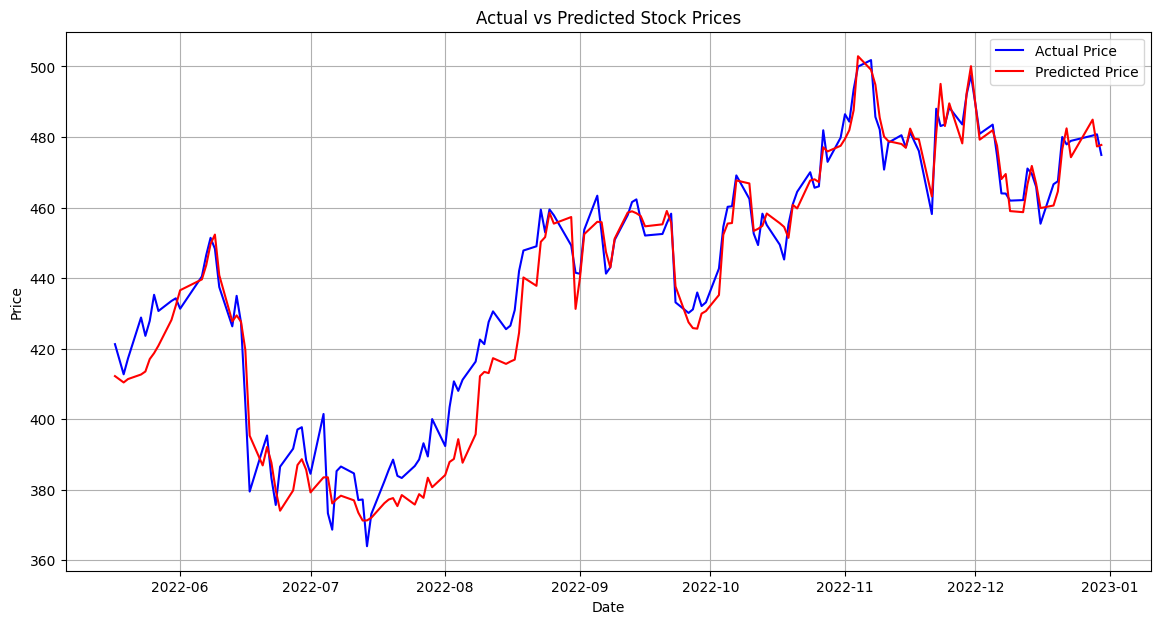

In [ ]:
# Make predictions on the validation set
y_val_pred = best_model.predict(X_val)

# Evaluate the model on the validation set
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = val_mse ** 0.5
val_r2 = r2_score(y_val, y_val_pred)

print(f"\nValidation Mean Absolute Error (MAE): {val_mae:.2f}")
print(f"Validation Mean Squared Error (MSE): {val_mse:.2f}")
print(f"Validation Root Mean Squared Error (RMSE): {val_rmse:.2f}")
print(f"Validation R-squared (R2): {val_r2:.2f}")

# Make predictions on the test set
y_test_pred = best_model.predict(X_test)

# Evaluate the model on the test set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = test_mse ** 0.5
test_r2 = r2_score(y_test, y_test_pred)

print(f"\nTest Mean Absolute Error (MAE): {test_mae:.2f}")
print(f"Test Mean Squared Error (MSE): {test_mse:.2f}")
print(f"Test Root Mean Squared Error (RMSE): {test_rmse:.2f}")
print(f"Test R-squared (R2): {test_r2:.2f}")

# Visualise the predictions
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Price', color='b')
plt.plot(y_test.index, y_test_pred, label='Predicted Price', color='r')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# SVR Section

## SVR Default 10 year - MAE

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Download the historical stock data for the past 10 years
data = yf.download('BP.L', start='2013-01-01', end='2023-01-01')

# Prepare the feature matrix (X) and target vector (y)
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Train the SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Make predictions
y_pred = svr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print("R^2 Score:", r2)

Mean Absolute Error (MAE): 9.99
Mean Squared Error (MSE): 538.47
Root Mean Squared Error (RMSE): 23.20
R^2 Score: 0.9270011118302041


## SVR Default 5 year - MAE

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Download the historical stock data for the past 5 years
data = yf.download('BP.L', start='2018-01-01', end='2023-01-01')

# Prepare the feature matrix (X) and target vector (y)
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Train the SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Make predictions
y_pred = svr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 645.5373542085198
Mean Absolute Error (MAE): 13.545775013888491
Root Mean Squared Error (RMSE): 25.40742714657507
R^2 Score: 0.9424248504454152


## SVR Feature Engineering - MAE

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Download historical stock data for BP for the past 5 years
data = yf.download('BP.L', start='2018-01-01', end='2023-01-01')

# Feature Engineering: Moving Averages (SMA) and Relative Strength Index (RSI)
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Generate lagged close prices
lagged_periods = 5
for i in range(1, lagged_periods + 1):
    data[f'Close_Lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare the data
X = data[['SMA_20', 'SMA_200', 'RSI', 'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5']]
y = data['Close']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training, validation, and testing sets (70/15/15 split)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Train the SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Make predictions on the test set
y_train_pred = svr.predict(X_train)
y_val_pred = svr.predict(X_val)
y_test_pred = svr.predict(X_test)

In [ ]:
# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_val = mean_squared_error(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_overall = mean_squared_error(y, svr.predict(X_scaled))
mae_overall = mean_absolute_error(y, svr.predict(X_scaled))
r2_overall = r2_score(y, svr.predict(X_scaled))

In [ ]:
# Calculate RMSE for each set
rmse_train = np.sqrt(mse_train)
rmse_val = np.sqrt(mse_val)
rmse_test = np.sqrt(mse_test)
rmse_overall = np.sqrt(mse_overall)

# Display results with RMSE
print("Training Set Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
print(f"R^2 Score: {r2_train:.2f}")

print("\nValidation Set Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_val:.2f}")
print(f"Mean Squared Error (MSE): {mse_val:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_val:.2f}")
print(f"R^2 Score: {r2_val:.2f}")

print("\nTesting Set Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R^2 Score: {r2_test:.2f}")

print("\nOverall Set Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_overall:.2f}")
print(f"Mean Squared Error (MSE): {mse_overall:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_overall:.2f}")
print(f"R^2 Score: {r2_overall:.2f}")

Training Set Evaluation:
Mean Absolute Error (MAE): 19.13
Mean Squared Error (MSE): 909.21
Root Mean Squared Error (RMSE): 30.15
R^2 Score: 0.91

Validation Set Evaluation:
Mean Absolute Error (MAE): 19.96
Mean Squared Error (MSE): 1061.40
Root Mean Squared Error (RMSE): 32.58
R^2 Score: 0.90

Testing Set Evaluation:
Mean Absolute Error (MAE): 19.03
Mean Squared Error (MSE): 863.89
Root Mean Squared Error (RMSE): 29.39
R^2 Score: 0.92

Overall Set Evaluation:
Mean Absolute Error (MAE): 19.24
Mean Squared Error (MSE): 925.26
Root Mean Squared Error (RMSE): 30.42
R^2 Score: 0.91



Comparison for the last 10 days using SVR:
        Date      Actual  Prediction  Difference
0 2022-12-15  465.850006  459.870350    5.979656
1 2022-12-16  455.399994  457.387331   -1.987337
2 2022-12-19  466.600006  458.646983    7.953023
3 2022-12-20  467.450012  455.206984   12.243028
4 2022-12-21  480.000000  467.325804   12.674196
5 2022-12-22  477.899994  471.138968    6.761026
6 2022-12-23  478.899994  472.114743    6.785251
7 2022-12-28  480.399994  477.507606    2.892387
8 2022-12-29  480.750000  476.550882    4.199118
9 2022-12-30  474.899994  480.277503   -5.377510


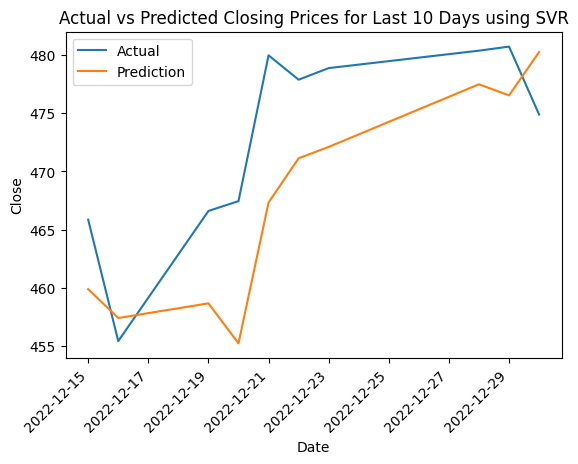

In [ ]:
import matplotlib.pyplot as plt

def calculate_difference(actual_values, predictions):
    difference = actual_values - predictions
    return difference

def plot_predictions_svr(data, model, days, feature_columns, scaler):
    last_n_days_features = data[feature_columns].iloc[-days:]
    actual_values = data['Close'].iloc[-days:].values

    # Scale the input features for prediction
    last_n_days_features_scaled = scaler.transform(last_n_days_features)
    predictions = model.predict(last_n_days_features_scaled)

    comparison = pd.DataFrame({
        'Date': data.index[-days:],  # Assuming the index is a DatetimeIndex
        'Actual': actual_values,
        'Prediction': predictions
    })

    difference = calculate_difference(actual_values, predictions)
    comparison['Difference'] = difference

    print(f'\nComparison for the last {days} days using SVR:')
    print(comparison)

    comparison.set_index('Date', inplace=True)

    # Plot actual vs. predicted closing prices
    comparison[['Actual', 'Prediction']].plot(kind='line')
    plt.xlabel('Date')
    plt.ylabel('Close')
    plt.title(f'Actual vs Predicted Closing Prices for Last {days} Days using SVR')
    plt.xticks(rotation=45)
    plt.show()

# Assuming feature_columns contains the relevant feature names used to fit the model
feature_columns = ['SMA_20', 'SMA_200', 'RSI', 'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5']
# Plot actual vs. predicted closing prices using SVR
plot_predictions_svr(data, svr, 10, feature_columns, scaler)

## SVR Hypertuning - MAE

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Step 2: Download the historical stock data for the past 5 years
data = yf.download('BP.L', start='2018-01-01', end='2023-01-01')

# Prepare the features
X = data[['Open', 'High', 'Low', 'Volume']].iloc[:-1]
y = data['Close'].iloc[:-1]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform train-validation-test split (70/15/15 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15/(0.85), random_state=42)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Perform hyperparameter optimization using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5)
grid_search.fit(X_train, y_train)
svr_best = grid_search.best_estimator_

In [ ]:
# Evaluate the model on the training set
predictions_train = svr_best.predict(X_train)
mae_train = mean_absolute_error(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)
r2_train = r2_score(y_train, predictions_train)

# Evaluate the model on the validation set
predictions_val = svr_best.predict(X_val)
mae_val = mean_absolute_error(y_val, predictions_val)
mse_val = mean_squared_error(y_val, predictions_val)
r2_val = r2_score(y_val, predictions_val)

# Evaluate the model on the test set
predictions_test = svr_best.predict(X_test)
mae_test = mean_absolute_error(y_test, predictions_test)
mse_test = mean_squared_error(y_test, predictions_test)
r2_test = r2_score(y_test, predictions_test)

# Evaluate the model on the overall dataset
predictions_all = svr_best.predict(X_scaled)
mae_all = mean_absolute_error(y, predictions_all)
mse_all = mean_squared_error(y, predictions_all)
r2_all = r2_score(y, predictions_all)

In [ ]:
# Train a new SVR model using the best parameters
svr_tuned = SVR(kernel='rbf', C=svr_best.C, gamma=svr_best.gamma)
svr_tuned.fit(X_train, y_train)

# Make predictions with the tuned model
y_train_pred_tuned = svr_tuned.predict(X_train)
y_val_pred_tuned = svr_tuned.predict(X_val)
y_test_pred_tuned = svr_tuned.predict(X_test)

# Evaluate the model with tuned hyperparameters
def evaluate_model(y_true, y_pred, set_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{set_name} Set Evaluation:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")

evaluate_model(y_train, y_train_pred_tuned, "Tuned Training")
evaluate_model(y_val, y_val_pred_tuned, "Tuned Validation")
evaluate_model(y_test, y_test_pred_tuned, "Tuned Testing")

# Evaluate the tuned model on the entire dataset
y_pred_all_tuned = svr_tuned.predict(X_scaled)
evaluate_model(y, y_pred_all_tuned, "Tuned Overall")


Tuned Training Set Evaluation:
Mean Absolute Error (MAE): 3.72
Mean Squared Error (MSE): 31.43
Root Mean Squared Error (RMSE): 5.61
R-squared (R2): 1.00

Tuned Validation Set Evaluation:
Mean Absolute Error (MAE): 4.38
Mean Squared Error (MSE): 142.23
Root Mean Squared Error (RMSE): 11.93
R-squared (R2): 0.99

Tuned Testing Set Evaluation:
Mean Absolute Error (MAE): 3.61
Mean Squared Error (MSE): 21.39
Root Mean Squared Error (RMSE): 4.62
R-squared (R2): 1.00

Tuned Overall Set Evaluation:
Mean Absolute Error (MAE): 3.80
Mean Squared Error (MSE): 46.58
Root Mean Squared Error (RMSE): 6.82
R-squared (R2): 1.00


## SVR Combine 1 - MAE

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Download historical stock data for BP for the past 7 years
data = yf.download('BP.L' , start='2016-01-01', end='2023-01-01')

# Feature Engineering: Moving Averages, RSI, and Lags
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Lagged Close prices
data['lag_1'] = data['Close'].shift(1)
data['lag_2'] = data['Close'].shift(2)
data['lag_3'] = data['Close'].shift(3)
data['lag_4'] = data['Close'].shift(4)
data['lag_5'] = data['Close'].shift(5)

# Drop rows with missing values
data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare the data
X = data[['SMA_50', 'SMA_200', 'RSI', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = data['Close']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training, validation, and testing sets (70/15/15 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15/(0.85), shuffle=False)

In [ ]:
# Perform hyperparameter tuning with GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# Train a new SVR model using the best parameters
svr_tuned = SVR(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
svr_tuned.fit(X_train, y_train)

SVR(C=100, gamma=0.001)

In [ ]:
# Make predictions with the tuned model
y_train_pred_tuned = svr_tuned.predict(X_train)
y_val_pred_tuned = svr_tuned.predict(X_val)
y_test_pred_tuned = svr_tuned.predict(X_test)

# Evaluate the model with tuned hyperparameters
def evaluate_model(y_true, y_pred, set_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{set_name} Set Evaluation:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print("R² Score:", r2)

evaluate_model(y_train, y_train_pred_tuned, "Tuned Training")
evaluate_model(y_val, y_val_pred_tuned, "Tuned Validation")
evaluate_model(y_test, y_test_pred_tuned, "Tuned Testing")


Tuned Training Set Evaluation:
Mean Absolute Error (MAE): 6.48
Mean Squared Error (MSE): 94.08
Root Mean Squared Error (RMSE): 9.70
R² Score: 0.9908079327423217

Tuned Validation Set Evaluation:
Mean Absolute Error (MAE): 5.14
Mean Squared Error (MSE): 40.26
Root Mean Squared Error (RMSE): 6.35
R² Score: 0.9374060884458234

Tuned Testing Set Evaluation:
Mean Absolute Error (MAE): 7.57
Mean Squared Error (MSE): 89.77
Root Mean Squared Error (RMSE): 9.47
R² Score: 0.9421914849487113


## SVR Combine 2 - MAE

In [ ]:
import time
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Start timer for data download
start_time = time.time()
# Download historical stock data for BP for the past 7 years
data = yf.download('BP.L', start='2016-01-01', end='2023-01-01')
print(f"Time taken to download data: {time.time() - start_time:.2f} seconds")

# Start timer for feature engineering
start_time = time.time()
# Feature Engineering: Moving Averages, RSI, Lags, and Volatility Measures
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate RSI
delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Lagged Close prices (5 lags)
for lag in range(1, 6):
    data[f'lag_{lag}'] = data['Close'].shift(lag)

# Volatility Measures - Standard Deviation
data['Volatility_30d'] = data['Close'].rolling(window=30).std()

# Drop rows with missing values
data.dropna(inplace=True)
print(f"Time taken for feature engineering: {time.time() - start_time:.2f} seconds")

[*********************100%***********************]  1 of 1 completed

Time taken to download data: 0.04 seconds
Time taken for feature engineering: 0.01 seconds


In [ ]:
# Prepare the data
X = data[['SMA_50', 'SMA_200', 'RSI', 'Volatility_30d'] + [f'lag_{i}' for i in range(1, 6)]]
y = data['Close']

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Start timer for splitting data
start_time = time.time()
# Split the data into training, validation, and test sets (80/10/10)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)
print(f"Time taken for data splitting: {time.time() - start_time:.2f} seconds")

Time taken for data splitting: 0.00 seconds


In [ ]:
# Start timer for hyperparameter tuning
start_time = time.time()
# Perform hyperparameter tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'linear', 'poly']
}

grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")
print(f"Time taken for hyperparameter tuning: {time.time() - start_time:.2f} seconds")

# Start timer for training the tuned SVR model
start_time = time.time()
# Train a new SVR model using the best parameters
svr_tuned = SVR(kernel=best_params['kernel'], C=best_params['C'], gamma=best_params['gamma'])
svr_tuned.fit(X_train, y_train)
print(f"Time taken to train SVR model: {time.time() - start_time:.2f} seconds")

Best parameters found: {'C': 1000, 'gamma': 1, 'kernel': 'linear'}
Time taken for hyperparameter tuning: 77.49 seconds
Time taken to train SVR model: 0.41 seconds


In [ ]:
# Make predictions and evaluate the model
y_val_pred = svr_tuned.predict(X_val)
y_test_pred = svr_tuned.predict(X_test)

# Evaluate the model on validation set
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = val_mse ** 0.5
val_r2 = r2_score(y_val, y_val_pred)

# Evaluate the model on test set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = test_mse ** 0.5
test_r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print(f"\nValidation Mean Absolute Error (MAE): {val_mae:.2f}")
print(f"Validation Mean Squared Error (MSE): {val_mse:.2f}")
print(f"Validation Root Mean Squared Error (RMSE): {val_rmse:.2f}")
print(f"Validation R-squared (R2): {val_r2:.2f}")

print(f"\nTest Mean Absolute Error (MAE): {test_mae:.2f}")
print(f"Test Mean Squared Error (MSE): {test_mse:.2f}")
print(f"Test Root Mean Squared Error (RMSE): {test_rmse:.2f}")
print(f"Test R-squared (R2): {test_r2:.2f}")


Validation Mean Absolute Error (MAE): 6.04
Validation Mean Squared Error (MSE): 63.20
Validation Root Mean Squared Error (RMSE): 7.95
Validation R-squared (R2): 0.91

Test Mean Absolute Error (MAE): 5.91
Test Mean Squared Error (MSE): 58.85
Test Root Mean Squared Error (RMSE): 7.67
Test R-squared (R2): 0.95


## SVR Combine 3 - MAE

In [ ]:
import time
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Start timer for data download
start_time = time.time()

# Download historical stock data for BP for the past 7 years
data = yf.download('BP.L', start='2016-01-01', end='2023-01-01')
print(f"Time taken to download data: {time.time() - start_time:.2f} seconds")

# Start timer for feature engineering
start_time = time.time()

# Feature Engineering: Moving Averages, RSI, Lags, MACD, Bollinger Bands, and Volatility Measures
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate RSI
delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Lagged Close prices (5 lags)
for lag in range(1, 6):
    data[f'lag_{lag}'] = data['Close'].shift(lag)

# Volatility Measures - Standard Deviation
data['Volatility_30d'] = data['Close'].rolling(window=30).std()

# Function to compute the Moving Average Convergence Divergence (MACD)
def compute_macd(data, short_window=12, long_window=26):
    exp1 = data['Close'].ewm(span=short_window, adjust=False).mean()
    exp2 = data['Close'].ewm(span=long_window, adjust=False).mean()
    return exp1 - exp2

# Calculate MACD
data['MACD'] = compute_macd(data)

# Calculate Bollinger Bands
data['Bollinger_High'] = data['Close'].rolling(window=20).mean() + (data['Close'].rolling(window=20).std() * 2)
data['Bollinger_Low'] = data['Close'].rolling(window=20).mean() - (data['Close'].rolling(window=20).std() * 2)

# Drop rows with missing values
data.dropna(inplace=True)
print(f"Time taken for feature engineering: {time.time() - start_time:.2f} seconds")

[*********************100%***********************]  1 of 1 completed

Time taken to download data: 0.04 seconds
Time taken for feature engineering: 0.02 seconds


In [ ]:
# Prepare the data
X = data[['SMA_50', 'SMA_200', 'RSI', 'Volatility_30d', 'MACD',
           'Bollinger_High', 'Bollinger_Low'] + [f'lag_{i}' for i in range(1, 6)]]
y = data['Close']

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Start timer for splitting data
start_time = time.time()

# Split the data into training, validation, and test sets (80/10/10)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)
print(f"Time taken for data splitting: {time.time() - start_time:.2f} seconds")

Time taken for data splitting: 0.00 seconds


In [ ]:
# Start timer for hyperparameter tuning
start_time = time.time()

# Perform hyperparameter tuning with RandomizedSearchCV
param_dist = {
    'C': [1, 10, 100],
    'gamma': [0.01, 0.001, 'scale'],
    'kernel': ['rbf', 'linear']
}

random_search = RandomizedSearchCV(SVR(), param_distributions=param_dist,
                                   n_iter=10, cv=5, scoring='neg_mean_squared_error',
                                   verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print(f"Best parameters found: {best_params}")
print(f"Time taken for hyperparameter tuning: {time.time() - start_time:.2f} seconds")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'kernel': 'linear', 'gamma': 0.01, 'C': 100}
Time taken for hyperparameter tuning: 3.92 seconds


In [ ]:
# Start timer for training the tuned SVR model
start_time = time.time()

# Train a new SVR model using the best parameters
svr_tuned = SVR(kernel=best_params['kernel'], C=best_params['C'], gamma=best_params['gamma'])
svr_tuned.fit(X_train, y_train)
print(f"Time taken to train SVR model: {time.time() - start_time:.2f} seconds")

# Make predictions and evaluate the model
y_val_pred = svr_tuned.predict(X_val)
y_test_pred = svr_tuned.predict(X_test)

# Evaluate the model on validation set
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = val_mse ** 0.5
val_r2 = r2_score(y_val, y_val_pred)

# Evaluate the model on test set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = test_mse ** 0.5
test_r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print(f"\nValidation Mean Absolute Error (MAE): {val_mae:.2f}")
print(f"Validation Mean Squared Error (MSE): {val_mse:.2f}")
print(f"Validation Root Mean Squared Error (RMSE): {val_rmse:.2f}")
print(f"Validation R-squared (R2): {val_r2:.2f}")

print(f"\nTest Mean Absolute Error (MAE): {test_mae:.2f}")
print(f"Test Mean Squared Error (MSE): {test_mse:.2f}")
print(f"Test Root Mean Squared Error (RMSE): {test_rmse:.2f}")
print(f"Test R-squared (R2): {test_r2:.2f}")

Time taken to train SVR model: 0.24 seconds

Validation Mean Absolute Error (MAE): 4.71
Validation Mean Squared Error (MSE): 37.21
Validation Root Mean Squared Error (RMSE): 6.10
Validation R-squared (R2): 0.94

Test Mean Absolute Error (MAE): 4.62
Test Mean Squared Error (MSE): 36.92
Test Root Mean Squared Error (RMSE): 6.08
Test R-squared (R2): 0.97


# Linear Section

## Linear 10 years - MAE -

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Download historical stock data for BP for the past 10 years
data = yf.download('BP.L', start='2012-01-01', end='2023-01-01')

# Prepare feature matrix (X) and target vector (y)
X = data[['Open', 'High', 'Low', 'Volume']]  # Features
y = data['Close']  # Target variable: today's closing price

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Train the Linear Regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Make predictions
y_pred = linreg.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 3.606502456570307
Mean Squared Error (MSE): 23.049878042683147
Root Mean Squared Error (RMSE): 4.801028852515172
R² Score: 0.9963835926440251


##Linear Default -MAE


In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Download historical stock data for BP for the past 5 years
data = yf.download('BP.L', start='2018-01-01', end='2023-01-01')

# Prepare feature matrix (X) and target vector (y)
X = data[['Open', 'High', 'Low', 'Volume']]  # Features
y = data['Close']  # Target variable: today's closing price

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Train the Linear Regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Make predictions
y_pred = linreg.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 4.046459912883713
Mean Squared Error (MSE): 27.65444504914223
Root Mean Squared Error (RMSE): 5.258749380712322
R² Score: 0.9975335140574388


## Linear Feature Engineering -MAE

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import time as time

# Start timer for data download
start_time = time.time()
# Download historical stock data for BP for the past 7 years
data = yf.download('BP.L', start='2016-01-01', end='2023-01-01')
print(f"Time taken to download data: {time.time() - start_time:.2f} seconds")

# Start timer for feature engineering
start_time = time.time()

# Feature Engineering:
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Lagged Close prices
data['lag_1'] = data['Close'].shift(1)
data['lag_2'] = data['Close'].shift(2)
data['lag_3'] = data['Close'].shift(3)
data['lag_4'] = data['Close'].shift(4)
data['lag_5'] = data['Close'].shift(5)

# Drop rows with missing values
data.dropna(inplace=True)
print(f"Time taken for feature engineering: {time.time() - start_time:.2f} seconds")

[*********************100%***********************]  1 of 1 completed

Time taken to download data: 0.09 seconds
Time taken for feature engineering: 0.02 seconds


In [ ]:
# Prepare the data
X = data[['SMA_20', 'SMA_200', 'RSI', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = data['Close']

# Start timer for splitting data
start_time = time.time()
# Split the data into training, validation, and testing sets (70/15/15 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15/(0.85), shuffle=False)
print(f"Time taken for data splitting: {time.time() - start_time:.2f} seconds")

Time taken for data splitting: 0.00 seconds


In [ ]:
# Start timer for model training
start_time = time.time()
# Train the Linear Regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(f"Time taken to train Linear Regression model: {time.time() - start_time:.2f} seconds")

# Make predictions
y_train_pred = linreg.predict(X_train)
y_val_pred = linreg.predict(X_val)
y_test_pred = linreg.predict(X_test)

# Evaluate the model
def evaluate_model(y_true, y_pred, set_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{set_name} Set Evaluation:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print("R² Score:", r2)

evaluate_model(y_train, y_train_pred, "Training")
evaluate_model(y_val, y_val_pred, "Validation")
evaluate_model(y_test, y_test_pred, "Testing")

Time taken to train Linear Regression model: 0.01 seconds

Training Set Evaluation:
Mean Absolute Error (MAE): 4.82
Mean Squared Error (MSE): 49.71
Root Mean Squared Error (RMSE): 7.05
R² Score: 0.995142775126979

Validation Set Evaluation:
Mean Absolute Error (MAE): 3.88
Mean Squared Error (MSE): 26.24
Root Mean Squared Error (RMSE): 5.12
R² Score: 0.9592049191703976

Testing Set Evaluation:
Mean Absolute Error (MAE): 5.95
Mean Squared Error (MSE): 58.81
Root Mean Squared Error (RMSE): 7.67
R² Score: 0.9621258363064493


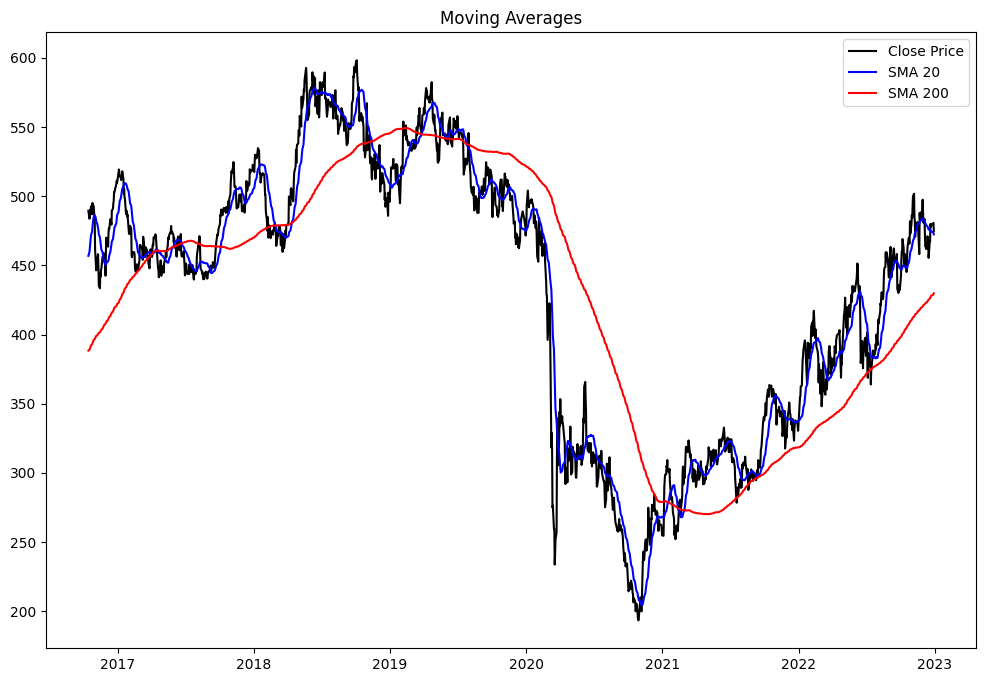

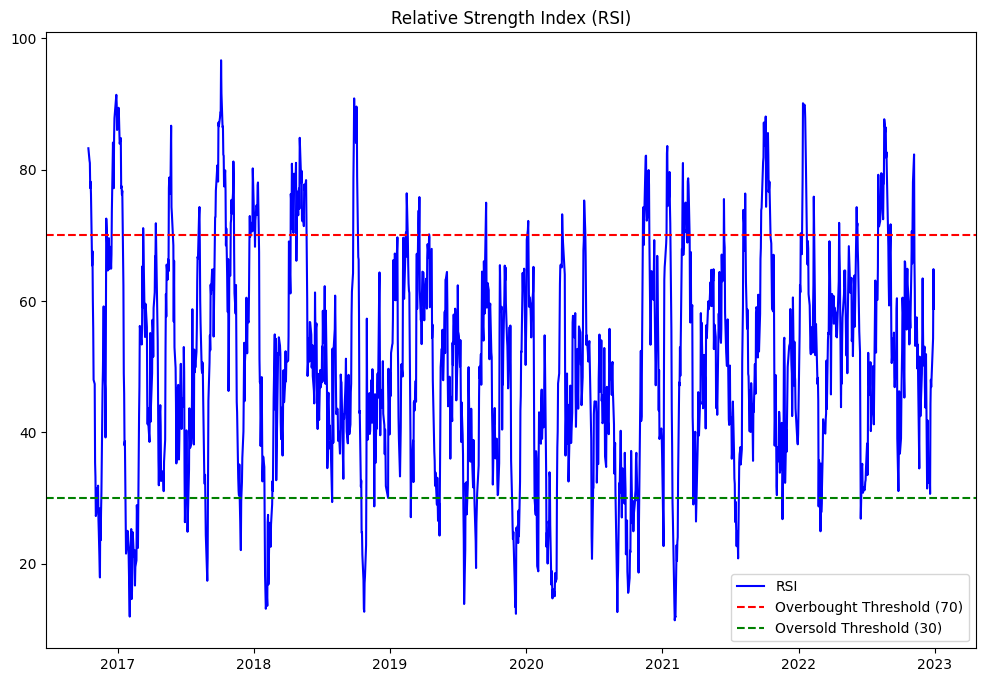

In [ ]:
import matplotlib.pyplot as plt

# Plot Moving Averages
plt.figure(figsize=(12, 8))
plt.plot(data.index, data['Close'], label='Close Price', color='black')
plt.plot(data.index, data['SMA_20'], label='SMA 20', color='blue')
plt.plot(data.index, data['SMA_200'], label='SMA 200', color='red')
plt.title('Moving Averages')
plt.legend()
plt.show()

# Plot Relative Strength Index (RSI)
plt.figure(figsize=(12, 8))
plt.plot(data.index, data['RSI'], label='RSI', color='blue')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought Threshold (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold Threshold (30)')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.show()

## Linear Hypertuning - MAE

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import time

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Start timer for data download
start_time = time.time()

# Download historical stock data for BP for the past 7 years
data = yf.download('BP.L', start='2016-01-01', end='2023-01-01')
print(f"Time taken to download data: {time.time() - start_time:.2f} seconds")

# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume']]  # Features
y = data['Close']  # Target variable: today's closing price

# Start timer for splitting data
start_time = time.time()

# Split the data into training, validation, and testing sets (70/15/15 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15/0.85, shuffle=False)
print(f"Time taken for data splitting: {time.time() - start_time:.2f} seconds")

[*********************100%***********************]  1 of 1 completed

Time taken to download data: 0.08 seconds
Time taken for data splitting: 0.00 seconds


In [ ]:
# Hyperparameter Tuning using GridSearchCV
start_time = time.time()

# Define the parameter grid for polynomial degree
param_grid = {
    'poly__degree': [1, 2, 3, 4, 5]
}

# Create a Linear Regression model
linreg = LinearRegression()

# Create a model that will turn the features into polynomial features
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linreg', linreg)
])

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_val, y_train_val)

print(f"Time taken for hyperparameter tuning: {time.time() - start_time:.2f} seconds")

# Get the best model
best_model = grid_search.best_estimator_

Time taken for hyperparameter tuning: 1.91 seconds


In [ ]:
# Make predictions on the test set
y_test_pred = best_model.predict(X_test)

# Evaluate the best model
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print(f"Testing (Best Model) - MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}")

Testing (Best Model) - MAE: 4.61, MSE: 36.95, RMSE: 6.08, R2: 0.98


## Linear combine 1- MAE

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import time
from sklearn.pipeline import Pipeline

# Start timer for data download
start_time = time.time()

# Download historical stock data for BP for the past 7 years
data = yf.download('BP.L', start='2016-01-01', end='2023-01-01')
print(f"Time taken to download data: {time.time() - start_time:.2f} seconds")

# Start timer for feature engineering
start_time = time.time()

# Feature Engineering: Moving Averages, RSI, and Lags
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Lagged Close prices
for lag in range(1, 6):
    data[f'lag_{lag}'] = data['Close'].shift(lag)

# Drop rows with missing values (introduced by lags and moving averages)
data.dropna(inplace=True)
print(f"Time taken for feature engineering: {time.time() - start_time:.2f} seconds")

[*********************100%***********************]  1 of 1 completed

Time taken to download data: 0.06 seconds
Time taken for feature engineering: 0.02 seconds


In [ ]:
# Prepare the data
X = data[['SMA_20', 'SMA_200', 'RSI', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = data['Close']

# Start timer for splitting data
start_time = time.time()

# Split the data into training, validation, and testing sets (70/15/15 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15/0.85, shuffle=False)
print(f"Time taken for data splitting: {time.time() - start_time:.2f} seconds")

Time taken for data splitting: 0.01 seconds


In [ ]:
# Hyperparameter Tuning using GridSearchCV
start_time = time.time()

# Create a Linear Regression model
linreg = LinearRegression()

# Create a model that will turn the features into polynomial features
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linreg', linreg)
])

# Define the parameter grid for polynomial degree
param_grid = {
    'poly__degree': [1, 2, 3, 4, 5]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_val, y_train_val)  # Fit on combined train and validation data

print(f"Time taken for hyperparameter tuning: {time.time() - start_time:.2f} seconds")

# Get the best model
best_model = grid_search.best_estimator_

Time taken for hyperparameter tuning: 15.41 seconds


In [ ]:
# Make predictions on the test set
y_test_pred = best_model.predict(X_test)

# Evaluate the best model
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print(f"Testing (Best Model) - MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}")

Testing (Best Model) - MAE: 5.87, MSE: 57.37, RMSE: 7.57, R2: 0.96


## Linear Comine 2 - MAE

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import time

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Start timer for data download
start_time = time.time()

# Download historical stock data for BP for the past 7 years
data = yf.download('BP.L', start='2016-01-01', end='2023-01-01')
print(f"Time taken to download data: {time.time() - start_time:.2f} seconds")

# Start timer for feature engineering
start_time = time.time()

# Feature Engineering: Moving Averages, RSI, and Lags
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Lagged Close prices
for lag in range(1, 6):
    data[f'lag_{lag}'] = data['Close'].shift(lag)

# Drop rows with missing values
data.dropna(inplace=True)
print(f"Time taken for feature engineering: {time.time() - start_time:.2f} seconds")

[*********************100%***********************]  1 of 1 completed

Time taken to download data: 0.07 seconds
Time taken for feature engineering: 0.01 seconds


In [ ]:
# Prepare the data
X = data[['SMA_20', 'SMA_200', 'RSI', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = data['Close']

# Start timer for splitting data
start_time = time.time()

# Split the data into training (80%) and temporary (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, shuffle=False)

# Split the temporary data into validation (10%) and testing (10%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

print(f"Time taken for data splitting: {time.time() - start_time:.2f} seconds")

Time taken for data splitting: 0.01 seconds


In [ ]:
# Hyperparameter Tuning using GridSearchCV
start_time = time.time()

# Create a Linear Regression model
linreg = LinearRegression()

# Create a model that will turn the features into polynomial features
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linreg', linreg)
])

# Define the parameter grid for polynomial degree
param_grid = {
    'poly__degree': [1, 2, 3, 4, 5]  #
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"Time taken for hyperparameter tuning: {time.time() - start_time:.2f} seconds")

# Get the best model
best_model = grid_search.best_estimator_

Time taken for hyperparameter tuning: 13.95 seconds


In [ ]:
# Make predictions on the test set
y_test_pred = best_model.predict(X_test)

# Evaluate the best model
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print(f"Testing (Best Model) - MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}")

Testing (Best Model) - MAE: 5.32, MSE: 49.17, RMSE: 7.01, R2: 0.96


## Linear Combine 3 - MAE



In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import time
from sklearn.pipeline import Pipeline

# Start timer for data download
start_time = time.time()

# Download historical stock data for BP (BP.L) for the past 7 years
data = yf.download('BP.L', start='2016-01-01', end='2023-01-01')
print(f"Time taken to download data: {time.time() - start_time:.2f} seconds")

# Start timer for feature engineering
start_time = time.time()

# Feature Engineering: Moving Averages, RSI, and Lags
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Volatility (30-day rolling standard deviation)
data['Volatility_30d'] = data['Close'].rolling(window=30).std()

# MACD calculation
data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA_12'] - data['EMA_26']

# Bollinger Bands (20-day moving average and 2 standard deviations)
data['Bollinger_MA'] = data['Close'].rolling(window=20).mean()
data['Bollinger_STD'] = data['Close'].rolling(window=20).std()
data['Bollinger_High'] = data['Bollinger_MA'] + (data['Bollinger_STD'] * 2)
data['Bollinger_Low'] = data['Bollinger_MA'] - (data['Bollinger_STD'] * 2)

# Lagged Close prices
for lag in range(1, 6):
    data[f'lag_{lag}'] = data['Close'].shift(lag)

# Drop rows with missing values (introduced by lags and moving averages)
data.dropna(inplace=True)
print(f"Time taken for feature engineering: {time.time() - start_time:.2f} seconds")

[*********************100%***********************]  1 of 1 completed

Time taken to download data: 0.09 seconds
Time taken for feature engineering: 0.02 seconds


In [ ]:
# Prepare the data
X = data[['SMA_50', 'SMA_200', 'RSI', 'Volatility_30d', 'MACD',
           'Bollinger_High', 'Bollinger_Low'] + [f'lag_{i}' for i in range(1, 6)]]
y = data['Close']

# Start timer for splitting data
start_time = time.time()

# Split the data into 80 10 10
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

print(f"Time taken for data splitting: {time.time() - start_time:.2f} seconds")

Time taken for data splitting: 0.01 seconds


In [ ]:
# Hyperparameter Tuning using GridSearchCV
start_time = time.time()

# Create a Linear Regression model
linreg = LinearRegression()

# Create a model that will turn the features into polynomial features
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linreg', linreg)
])

# Define the parameter grid for polynomial degree
param_grid = {
    'poly__degree': [1, 2, 3, 4, 5]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"Time taken for hyperparameter tuning: {time.time() - start_time:.2f} seconds")

# Get the best model
best_model = grid_search.best_estimator_

Time taken for hyperparameter tuning: 31.35 seconds


In [ ]:
# Make predictions on the test set
y_test_pred = best_model.predict(X_test)

# Evaluate the best model
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print(f"Testing (Best Model) - MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}")

Testing (Best Model) - MAE: 4.18, MSE: 29.62, RMSE: 5.44, R2: 0.98


# Polynomial Section

## Polynomial default 10 years - MAE

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download historical data for BP.L stocks from Yahoo Finance (10 years)
symbol = 'BP.L'
data = yf.download(symbol, start='2013-01-01', end='2023-01-01')

# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume']]  # Features
y = data['Close']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Transform the features to include polynomial terms
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize and fit the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 3.5168987728046797
Mean Squared Error (MSE): 718.8649462600066
Root Mean Squared Error (RMSE): 26.8116569100085
R-squared (R2): 0.902544815234727


## Polynomial Default 5 years - MAE

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Download historical data for BP.L stocks from Yahoo Finance (5 years)
symbol = 'BP.L'
data = yf.download(symbol, start='2018-01-01', end='2023-01-01')

# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume']]  # Features
y = data['Close']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Transform the features to include polynomial terms
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialise and fit the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 2.265953111336193
Mean Squared Error (MSE): 8.63834958183948
Root Mean Squared Error (RMSE): 2.9391069361014206
R-squared (R2): 0.9992295499774928


## Polynominal Feature Engineering- MAE

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Download historical data for BP.L stocks from Yahoo Finance (5 years)
symbol = 'BP.L'
data = yf.download(symbol, start='2018-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()
delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))
data['Lag1'] = data['Close'].shift(1)
data['Lag2'] = data['Close'].shift(2)
data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'RSI', 'Lag1', 'Lag2']]
y = data['Close']

# Split the data
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Transform the features to include polynomial terms
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Initialise and fit the polynomial ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_poly, y_train)
y_pred_ridge = ridge_model.predict(X_test_poly)

In [ ]:
# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

mae_train, mse_train, rmse_train, r2_train = evaluate_model(y_train, ridge_model.predict(X_train_poly))
mae_val, mse_val, rmse_val, r2_val = evaluate_model(y_val, ridge_model.predict(X_val_poly))
mae_test, mse_test, rmse_test, r2_test = evaluate_model(y_test, y_pred_ridge)

# Display results
print("\nTraining Set:")
print("MAE:", mae_train)
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("R2:", r2_train)

print("\nValidation Set:")
print("MAE:", mae_val)
print("MSE:", mse_val)
print("RMSE:", rmse_val)
print("R2:", r2_val)

print("\nTesting Set (Ridge Regression):")
print("MAE:", mae_test)
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("R2:", r2_test)


Training Set:
MAE: 2.7389006255139714
MSE: 13.301938149057456
RMSE: 3.647182220435038
R2: 0.9990455074587481

Validation Set:
MAE: 5.073138249693008
MSE: 43.857041561743955
RMSE: 6.622464915856026
R2: 0.938784732795166

Testing Set (Ridge Regression):
MAE: 7.012467279021
MSE: 64.59520816610038
RMSE: 8.03711441788036
R2: 0.9467273496966726


## Polynominal Hypertuning - MAE

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download historical data for BP.L stocks from Yahoo Finance (7 years)
symbol = 'BP.L'
data = yf.download(symbol, start='2016-01-01', end='2023-01-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare the data
X = data[['Open', 'High', 'Volume', 'Low']]
y = data['Close']

# Split the data
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the updated parameter distributions for searching
param_distributions = {
    'polynomialfeatures__degree': [2, 3],
    'ridge__alpha': uniform(loc=0, scale=10)
}

# Create a pipeline for polynomial transformation and Ridge regression
pipeline = make_pipeline(PolynomialFeatures(), Ridge())

# Perform RandomizedSearchCV with a set number of iterations
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=10, cv=5, scoring='neg_mean_absolute_error', random_state=42)
random_search.fit(X_train_scaled, y_train)

# Get the best model
best_model = random_search.best_estimator_

In [ ]:
# Make predictions
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display results
print("Best Parameters:", random_search.best_params_)
print("\nEvaluation Metrics for Testing Set:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

Best Parameters: {'polynomialfeatures__degree': 2, 'ridge__alpha': 4.592488919658671}

Evaluation Metrics for Testing Set:
MAE: 3.49
MSE: 20.02
RMSE: 4.47
R2: 0.99


## Polynominal combine 1  - MAE

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download historical data for BP.L stocks from Yahoo Finance (7 years)
symbol = 'BP.L'
data = yf.download(symbol, start='2016-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Generate lagged close prices
lagged_periods = 5
for i in range(1, lagged_periods + 1):
    data[f'Close_Lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'RSI',
          'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5']]
y = data['Close']

# Split the data into training, validation, and testing sets (70/15/15 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create a pipeline for polynomial transformation and Ridge regression
pipeline = make_pipeline(PolynomialFeatures(), Ridge())

# Define the parameter grid for GridSearchCV
param_grid = {
    'polynomialfeatures__degree': [2, 3],  #
    'ridge__alpha': [0.01, 0.1, 1, 10]
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions
y_train_pred = best_model.predict(X_train_scaled)
y_val_pred = best_model.predict(X_val_scaled)
y_test_pred = best_model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

mae_train, mse_train, rmse_train, r2_train = evaluate_model(y_train, y_train_pred)
mae_val, mse_val, rmse_val, r2_val = evaluate_model(y_val, y_val_pred)
mae_test, mse_test, rmse_test, r2_test = evaluate_model(y_test, y_test_pred)

# Display results
print("Best Parameters:", grid_search.best_params_)

print("\nTraining Set:")
print(f"MAE: {mae_train:.2f}")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R2: {r2_train:.2f}")

print("\nValidation Set:")
print(f"MAE: {mae_val:.2f}")
print(f"MSE: {mse_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")
print(f"R2: {r2_val:.2f}")

print("\nTesting Set:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R2: {r2_test:.2f}")

Best Parameters: {'polynomialfeatures__degree': 2, 'ridge__alpha': 0.1}

Training Set:
MAE: 2.04
MSE: 7.56
RMSE: 2.75
R2: 1.00

Validation Set:
MAE: 1.98
MSE: 6.54
RMSE: 2.56
R2: 0.99

Testing Set:
MAE: 3.20
MSE: 17.49
RMSE: 4.18
R2: 0.99


## Polynominal combine 2 - MAE

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score)

# Set a random seed for reproducibility
random_seed = 42
np.random.seed(random_seed)

# Download historical data for BP.Lstocks from Yahoo Finance (7 years)
symbol = 'BP.L'
data = yf.download(symbol, start='2016-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Generate lagged close prices
lagged_periods = 5
for i in range(1, lagged_periods + 1):
    data[f'Close_Lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'RSI',
           'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5']]
y = data['Close']

# Split the data into training (60%), validation (20%), and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures()),
    ('ridge', Ridge())
])

# parameter grid for GridSearchCV
param_grid = {
    'poly_features__degree': [2, 3, 4],
    'ridge__alpha': [0.01, 0.1, 1, 10, 100]
}

# K-Fold Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=random_seed)

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'poly_features__degree': 2, 'ridge__alpha': 1}


In [ ]:
# Make predictions
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)
y_test_pred = best_model.predict(X_test)

# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    return mae, mse, rmse, r2

mae_train, mse_train, rmse_train, r2_train = evaluate_model(y_train, y_train_pred)
mae_val, mse_val, rmse_val, r2_val = evaluate_model(y_val, y_val_pred)
mae_test, mse_test, rmse_test, r2_test = evaluate_model(y_test, y_test_pred)

In [ ]:
# Display results
print("\nTraining Set Metrics:")
print(f"MAE: {mae_train:.2f}, MSE: {mse_train:.2f}, RMSE: {rmse_train:.2f}, R2: {r2_train:.2f}")

print("\nValidation Set Metrics:")
print(f"MAE: {mae_val:.2f}, MSE: {mse_val:.2f}, RMSE: {rmse_val:.2f}, R2: {r2_val:.2f}")

print("\nTesting Set Metrics:")
print(f"MAE: {mae_test:.2f}, MSE: {mse_test:.2f}, RMSE: {rmse_test:.2f}, R2: {r2_test:.2f}")


Training Set Metrics:
MAE: 2.14, MSE: 8.10, RMSE: 2.85, R2: 1.00

Validation Set Metrics:
MAE: 5.06, MSE: 43.06, RMSE: 6.56, R2: 0.96

Testing Set Metrics:
MAE: 3.51, MSE: 19.49, RMSE: 4.41, R2: 0.99


## Polynominal combine 3 -MAE

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download historical data for BP.L stocks
symbol = 'BP.L'
data = yf.download(symbol, start='2016-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()
data['RSI'] = calculate_rsi(data)
data['Volatility_30d'] = data['Close'].rolling(window=30).std()
data['MACD'] = (data['Close'].ewm(span=12).mean() - data['Close'].ewm(span=26).mean())
data['Bollinger_High'] = data['SMA_50'] + (data['Close'].rolling(window=50).std() * 2)
data['Bollinger_Low'] = data['SMA_50'] - (data['Close'].rolling(window=50).std() * 2)

# Generate lagged features and drop NaNs
for i in range(1, 6):
    data[f'lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare the data
X = data[['SMA_50', 'SMA_200', 'RSI', 'Volatility_30d', 'MACD', 'Bollinger_High', 'Bollinger_Low'] + [f'lag_{i}' for i in range(1, 6)]]
y = data['Close']

# Split the data 60 20 20
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

In [ ]:
ridge_pipeline = make_pipeline(StandardScaler(), PolynomialFeatures(), Ridge(max_iter=20000, tol=1e-3))
lasso_pipeline = make_pipeline(StandardScaler(), PolynomialFeatures(), Lasso(max_iter=20000, tol=1e-3))

# Update grids
param_grid_ridge = {
    'polynomialfeatures__degree': [2],
    'ridge__alpha': np.logspace(-4, 2, 7)
}

param_grid_lasso = {
    'polynomialfeatures__degree': [2],
    'lasso__alpha': np.logspace(-4, 0, 5)
}

# Cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Perform grid search for both models
grid_search_ridge = GridSearchCV(ridge_pipeline, param_grid_ridge, cv=tscv, scoring='neg_mean_absolute_error')
grid_search_ridge.fit(X_train, y_train)

grid_search_lasso = GridSearchCV(lasso_pipeline, param_grid_lasso, cv=tscv, scoring='neg_mean_absolute_error')
grid_search_lasso.fit(X_train, y_train)

# Best models
best_ridge = grid_search_ridge.best_estimator_
best_lasso = grid_search_lasso.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.551e+01, tolerance: 6.604e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.936e+02, tolerance: 1.871e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.621e+03, tolerance: 8.276e

In [ ]:
# Predictions for Ridge
y_train_pred_ridge = best_ridge.predict(X_train)
y_val_pred_ridge = best_ridge.predict(X_val)
y_test_pred_ridge = best_ridge.predict(X_test)

# Predictions for Lasso
y_train_pred_lasso = best_lasso.predict(X_train)
y_val_pred_lasso = best_lasso.predict(X_val)
y_test_pred_lasso = best_lasso.predict(X_test)

# Evaluate the models
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# Evaluate Ridge set
mae_train_ridge, mse_train_ridge, rmse_train_ridge, r2_train_ridge = evaluate_model(y_train, y_train_pred_ridge)
mae_val_ridge, mse_val_ridge, rmse_val_ridge, r2_val_ridge = evaluate_model(y_val, y_val_pred_ridge)
mae_test_ridge, mse_test_ridge, rmse_test_ridge, r2_test_ridge = evaluate_model(y_test, y_test_pred_ridge)

# Evaluate Lasso set
mae_train_lasso, mse_train_lasso, rmse_train_lasso, r2_train_lasso = evaluate_model(y_train, y_train_pred_lasso)
mae_val_lasso, mse_val_lasso, rmse_val_lasso, r2_val_lasso = evaluate_model(y_val, y_val_pred_lasso)
mae_test_lasso, mse_test_lasso, rmse_test_lasso, r2_test_lasso = evaluate_model(y_test, y_test_pred_lasso)

In [ ]:
# Display results for Ridge
print("Ridge Regression Best Parameters:", grid_search_ridge.best_params_)
print("\n--- Ridge Results ---")
print("\nTraining Set:", f"MAE: {mae_train_ridge:.2f}, MSE: {mse_train_ridge:.2f}, RMSE: {rmse_train_ridge:.2f}, R2: {r2_train_ridge:.2f}")
print("\nValidation Set:", f"MAE: {mae_val_ridge:.2f}, MSE: {mse_val_ridge:.2f}, RMSE: {rmse_val_ridge:.2f}, R2: {r2_val_ridge:.2f}")
print("\nTesting Set:", f"MAE: {mae_test_ridge:.2f}, MSE: {mse_test_ridge:.2f}, RMSE: {rmse_test_ridge:.2f}, R2: {r2_test_ridge:.2f}")

# Display results for Lasso
print("\nLasso Regression Best Parameters:", grid_search_lasso.best_params_)
print("\n--- Lasso Results ---")
print("\nTraining Set:", f"MAE: {mae_train_lasso:.2f}, MSE: {mse_train_lasso:.2f}, RMSE: {rmse_train_lasso:.2f}, R2: {r2_train_lasso:.2f}")
print("\nValidation Set:", f"MAE: {mae_val_lasso:.2f}, MSE: {mse_val_lasso:.2f}, RMSE: {rmse_val_lasso:.2f}, R2: {r2_val_lasso:.2f}")
print("\nTesting Set:", f"MAE: {mae_test_lasso:.2f}, MSE: {mse_test_lasso:.2f}, RMSE: {rmse_test_lasso:.2f}, R2: {r2_test_lasso:.2f}")

Ridge Regression Best Parameters: {'polynomialfeatures__degree': 2, 'ridge__alpha': 10.0}

--- Ridge Results ---

Training Set: MAE: 4.79, MSE: 39.96, RMSE: 6.32, R2: 0.99

Validation Set: MAE: 7.57, MSE: 93.80, RMSE: 9.69, R2: 0.91

Testing Set: MAE: 7.30, MSE: 80.71, RMSE: 8.98, R2: 0.96

Lasso Regression Best Parameters: {'lasso__alpha': 1.0, 'polynomialfeatures__degree': 2}

--- Lasso Results ---

Training Set: MAE: 5.27, MSE: 58.94, RMSE: 7.68, R2: 0.99

Validation Set: MAE: 5.01, MSE: 40.66, RMSE: 6.38, R2: 0.96

Testing Set: MAE: 6.13, MSE: 64.63, RMSE: 8.04, R2: 0.97


# Elastic Section

## Elastic Default 10 years -  MAE

In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download historical data for BP.L stocks from Yahoo Finance (10 years)
symbol = 'BP.L'
data = yf.download(symbol, start='2013-01-01', end='2023-01-01')

# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume']] # Features
y = data['Close'] # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialise and fit the Elastic Net regression model
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nMean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 11.004873998836505
Mean Squared Error (MSE): 204.9892827819615
Root Mean Squared Error (RMSE): 14.317446796896487
R-squared (R2): 0.9722099839026074


## Elastic default 5 years- MAE

In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download historical data for BP.L stocks from Yahoo Finance (5 years)
symbol = 'BP.L'
data = yf.download(symbol, start='2018-01-01', end='2023-01-01')

# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume']] # Features
y = data['Close'] # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the Elastic Net regression model
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nMean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 14.249009238478402
Mean Squared Error (MSE): 262.21482628298133
Root Mean Squared Error (RMSE): 16.193048702544598
R-squared (R2): 0.9766131924973074


## Elastic Feature Engineering - MAE

In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download historical data for BP.L stocks from Yahoo Finance (7 years)
symbol = 'BP.L'
data = yf.download(symbol, start='2016-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Generate lagged close prices
lagged_periods = 5
for i in range(1, lagged_periods + 1):
    data[f'Close_Lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'RSI',
          'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5']]
y = data['Close']

# Split the data into training, validation, and testing sets (70/15/15 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the Elastic Net regression model
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

mae_train, mse_train, rmse_train, r2_train = evaluate_model(y_train, y_train_pred)
mae_val, mse_val, rmse_val, r2_val = evaluate_model(y_val, y_val_pred)
mae_test, mse_test, rmse_test, r2_test = evaluate_model(y_test, y_test_pred)

# Display results
print("\nTraining Set:")
print(f"MAE: {mae_train:.2f}")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R2: {r2_train:.2f}")

print("\nValidation Set:")
print(f"MAE: {mae_val:.2f}")
print(f"MSE: {mse_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")
print(f"R2: {r2_val:.2f}")

print("\nTesting Set:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R2: {r2_test:.2f}")


Training Set:
MAE: 7.10
MSE: 95.62
RMSE: 9.78
R2: 0.99

Validation Set:
MAE: 3.77
MSE: 24.06
RMSE: 4.91
R2: 0.96

Testing Set:
MAE: 7.25
MSE: 82.12
RMSE: 9.06
R2: 0.95


## Elastic Hypertuning- MAE

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Download historical data for BP.L stocks from Yahoo Finance (7 years)
symbol = 'BP.L'
data = yf.download(symbol, start='2016-01-01', end='2023-01-01')


[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare the data
X = data[['Open', 'High', 'Volume', 'Low']]
y = data['Close']

# Split the data
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'alpha': [0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.9]
}

model = ElasticNet(max_iter=10000)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_

# Make predictions
y_train_pred = best_model.predict(X_train_scaled)
y_val_pred = best_model.predict(X_val_scaled)
y_test_pred = best_model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

mae_train, mse_train, rmse_train, r2_train = evaluate_model(y_train, y_train_pred)
mae_val, mse_val, rmse_val, r2_val = evaluate_model(y_val, y_val_pred)
mae_test, mse_test, rmse_test, r2_test = evaluate_model(y_test, y_test_pred)

# Display results
print("Best Parameters:", grid_search.best_params_)
print("\nTraining Set:")
print(f"MAE: {mae_train:.2f}")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R2: {r2_train:.2f}")

print("\nValidation Set:")
print(f"MAE: {mae_val:.2f}")
print(f"MSE: {mse_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")
print(f"R2: {r2_val:.2f}")

print("\nTesting Set:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R2: {r2_test:.2f}")

Best Parameters: {'alpha': 0.01, 'l1_ratio': 0.9}

Training Set:
MAE: 3.14
MSE: 18.77
RMSE: 4.33
R2: 1.00

Validation Set:
MAE: 3.83
MSE: 146.16
RMSE: 12.09
R2: 0.80

Testing Set:
MAE: 3.85
MSE: 26.22
RMSE: 5.12
R2: 0.99


## Elastic combine 1- MAE

In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
import time

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Download historical data for BP.L stocks from Yahoo Finance (7 years)
symbol = 'BP.L'
data = yf.download(symbol, start='2016-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Generate lagged close prices
lagged_periods = 5
for i in range(1, lagged_periods + 1):
    data[f'Close_Lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'RSI',
           'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5']]
y = data['Close']

# Split the data into training, validation, and testing sets (70/15/15 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialise the ElasticNet model
elastic_net = ElasticNet()

# Define the parameter grid for alpha and l1_ratio
param_grid = {
    'alpha': np.logspace(-3, 2, 6),
    'l1_ratio': np.linspace(0, 1, 6)
}

# Initialise GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Start timing before fitting
start_time = time.time()

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Stop timing after fitting
end_time = time.time()

# Calculate the time taken
time_taken = end_time - start_time

# Best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print(f"Time taken for GridSearchCV: {time_taken:.2f} seconds")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'alpha': 0.1, 'l1_ratio': 0.8}
Time taken for GridSearchCV: 10.27 seconds


In [ ]:
# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# Make predictions with the best model
y_train_pred_tuned = best_model.predict(X_train_scaled)
y_val_pred_tuned = best_model.predict(X_val_scaled)
y_test_pred_tuned = best_model.predict(X_test_scaled)

# Evaluate the tuned model
mae_train_tuned, mse_train_tuned, rmse_train_tuned, r2_train_tuned = evaluate_model(y_train, y_train_pred_tuned)
mae_val_tuned, mse_val_tuned, rmse_val_tuned, r2_val_tuned = evaluate_model(y_val, y_val_pred_tuned)
mae_test_tuned, mse_test_tuned, rmse_test_tuned, r2_test_tuned = evaluate_model(y_test, y_test_pred_tuned)

In [ ]:
# Display the tuned model results
print("\nTuned Training Set:")
print(f"MAE: {mae_train_tuned:.2f}")
print(f"MSE: {mse_train_tuned:.2f}")
print(f"RMSE: {rmse_train_tuned:.2f}")
print(f"R2: {r2_train_tuned:.2f}")

print("\nTuned Validation Set:")
print(f"MAE: {mae_val_tuned:.2f}")
print(f"MSE: {mse_val_tuned:.2f}")
print(f"RMSE: {rmse_val_tuned:.2f}")
print(f"R2: {r2_val_tuned:.2f}")

print("\nTuned Testing Set:")
print(f"MAE: {mae_test_tuned:.2f}")
print(f"MSE: {mse_test_tuned:.2f}")
print(f"RMSE: {rmse_test_tuned:.2f}")
print(f"R2: {r2_test_tuned:.2f}")


Tuned Training Set:
MAE: 4.08
MSE: 36.90
RMSE: 6.07
R2: 1.00

Tuned Validation Set:
MAE: 2.98
MSE: 15.29
RMSE: 3.91
R2: 0.98

Tuned Testing Set:
MAE: 4.82
MSE: 37.85
RMSE: 6.15
R2: 0.98


##Elastic Combine 2 - MAE

In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
import time

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download historical data for BP.L stocks from Yahoo Finance (7 years)
symbol = 'BP.L'
data = yf.download(symbol, start='2016-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Generate lagged close prices
lagged_periods = 5
for i in range(1, lagged_periods + 1):
    data[f'Close_Lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'RSI',
           'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5']]
y = data['Close']

# Split the data into training, validation, and testing sets (80/10/10 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1111, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialise the ElasticNet model
elastic_net = ElasticNet()

# Define the parameter grid for alpha and l1_ratio with a broader range
param_grid = {
    'alpha': np.logspace(-4, 2, 7),
    'l1_ratio': np.linspace(0, 1, 11)
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Start timing before fitting
start_time = time.time()

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Stop timing after fitting
end_time = time.time()

# Calculate the time taken
time_taken = end_time - start_time

# Best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print(f"Time taken for GridSearchCV: {time_taken:.2f} seconds")

Fitting 5 folds for each of 77 candidates, totalling 385 fits
Best Hyperparameters: {'alpha': 0.1, 'l1_ratio': 0.9}
Time taken for GridSearchCV: 4.92 seconds


In [ ]:
# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# Make predictions with the best model
y_train_pred_tuned = best_model.predict(X_train_scaled)
y_val_pred_tuned = best_model.predict(X_val_scaled)
y_test_pred_tuned = best_model.predict(X_test_scaled)

# Evaluate the tuned model
mae_train_tuned, mse_train_tuned, rmse_train_tuned, r2_train_tuned = evaluate_model(y_train, y_train_pred_tuned)
mae_val_tuned, mse_val_tuned, rmse_val_tuned, r2_val_tuned = evaluate_model(y_val, y_val_pred_tuned)
mae_test_tuned, mse_test_tuned, rmse_test_tuned, r2_test_tuned = evaluate_model(y_test, y_test_pred_tuned)

In [ ]:
# Display the tuned model results
print("\nTuned Training Set:")
print(f"MAE: {mae_train_tuned:.2f}")
print(f"MSE: {mse_train_tuned:.2f}")
print(f"RMSE: {rmse_train_tuned:.2f}")
print(f"R2: {r2_train_tuned:.2f}")

print("\nTuned Validation Set:")
print(f"MAE: {mae_val_tuned:.2f}")
print(f"MSE: {mse_val_tuned:.2f}")
print(f"RMSE: {rmse_val_tuned:.2f}")
print(f"R2: {r2_val_tuned:.2f}")

print("\nTuned Testing Set:")
print(f"MAE: {mae_test_tuned:.2f}")
print(f"MSE: {mse_test_tuned:.2f}")
print(f"RMSE: {rmse_test_tuned:.2f}")
print(f"R2: {r2_test_tuned:.2f}")


Tuned Training Set:
MAE: 3.77
MSE: 31.82
RMSE: 5.64
R2: 1.00

Tuned Validation Set:
MAE: 4.07
MSE: 27.29
RMSE: 5.22
R2: 0.96

Tuned Testing Set:
MAE: 4.38
MSE: 32.84
RMSE: 5.73
R2: 0.97


## Elastic Combine 3 - MAE

In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

# Download historical data for BP.L stocks from Yahoo Finance (7 years)
symbol = 'BP.L'
data = yf.download(symbol, start='2016-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Calculate Volatility (30-day rolling standard deviation of the closing price)
data['Volatility_30d'] = data['Close'].rolling(window=30).std()

# Calculate MACD
data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA_12'] - data['EMA_26']

# Calculate Bollinger Bands
data['Bollinger_High'] = data['SMA_50'] + (data['Close'].rolling(window=50).std() * 2)
data['Bollinger_Low'] = data['SMA_50'] - (data['Close'].rolling(window=50).std() * 2)

# Generate lagged close prices
lagged_periods = 5
for i in range(1, lagged_periods + 1):
    data[f'lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare the data with new features
X = data[['SMA_50', 'SMA_200', 'RSI', 'Volatility_30d', 'MACD', 'Bollinger_High', 'Bollinger_Low'] + [f'lag_{i}' for i in range(1, 6)]]
y = data['Close']

# Split the data into training, validation, and testing sets (80/10/10 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1111, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialise the ElasticNet model
elastic_net = ElasticNet()

# Define the parameter grid for alpha and l1_ratio with a broader range
param_grid = {
    'alpha': np.logspace(-4, 2, 7),
    'l1_ratio': np.linspace(0, 1, 11)
}

# Initialise GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Start timing before fitting
start_time = time.time()

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Stop timing after fitting
end_time = time.time()

# Calculate the time taken
time_taken = end_time - start_time

# Best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print(f"Time taken for GridSearchCV: {time_taken:.2f} seconds")

Fitting 5 folds for each of 77 candidates, totalling 385 fits
Best Hyperparameters: {'alpha': 0.01, 'l1_ratio': 1.0}
Time taken for GridSearchCV: 7.02 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.936e+04, tolerance: 1.439e+03
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# Make predictions with the best model
y_train_pred_tuned = best_model.predict(X_train_scaled)
y_val_pred_tuned = best_model.predict(X_val_scaled)
y_test_pred_tuned = best_model.predict(X_test_scaled)

# Evaluate the tuned model
mae_train_tuned, mse_train_tuned, rmse_train_tuned, r2_train_tuned = evaluate_model(y_train, y_train_pred_tuned)
mae_val_tuned, mse_val_tuned, rmse_val_tuned, r2_val_tuned = evaluate_model(y_val, y_val_pred_tuned)
mae_test_tuned, mse_test_tuned, rmse_test_tuned, r2_test_tuned = evaluate_model(y_test, y_test_pred_tuned)

In [ ]:
# Display the tuned model results
print("\nTuned Training Set:")
print(f"MAE: {mae_train_tuned:.2f}")
print(f"MSE: {mse_train_tuned:.2f}")
print(f"RMSE: {rmse_train_tuned:.2f}")
print(f"R2: {r2_train_tuned:.2f}")

print("\nTuned Validation Set:")
print(f"MAE: {mae_val_tuned:.2f}")
print(f"MSE: {mse_val_tuned:.2f}")
print(f"RMSE: {rmse_val_tuned:.2f}")
print(f"R2: {r2_val_tuned:.2f}")

print("\nTuned Testing Set:")
print(f"MAE: {mae_test_tuned:.2f}")
print(f"MSE: {mse_test_tuned:.2f}")
print(f"RMSE: {rmse_test_tuned:.2f}")
print(f"R2: {r2_test_tuned:.2f}")


Tuned Training Set:
MAE: 4.84
MSE: 45.08
RMSE: 6.71
R2: 1.00

Tuned Validation Set:
MAE: 5.51
MSE: 51.42
RMSE: 7.17
R2: 0.92

Tuned Testing Set:
MAE: 5.39
MSE: 47.92
RMSE: 6.92
R2: 0.96


**(Effective for datasets with a mix of important and irrelevant features but may underperform in capturing complex patterns.)**

# KNN Section

## KNN Default 10 years - MAE

In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download historical data for BP.L stocks from Yahoo Finance (10 years)
symbol = 'BP.L'
data = yf.download(symbol, start='2013-01-01', end='2023-01-01')

# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume']]  # Features
y = data['Close']  # Target

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Initialise and fit the KNN regression model
model = KNeighborsRegressor()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 3.9511019625522126
Mean Squared Error (MSE): 55.97689164232151
Root Mean Squared Error (RMSE): 7.48177062214029
R-squared (R2): 0.9924113168322232


## KNN default 5 years - MAE

In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download historical data for BP.L stocks from Yahoo Finance (10 years)
symbol = 'BP.L'
data = yf.download(symbol, start='2018-01-01', end='2023-01-01')

# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume']]  # Features
y = data['Close']  # Target

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Initialise and fit the KNN regression model
model = KNeighborsRegressor()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 4.617145150805275
Mean Squared Error (MSE): 47.49686109781031
Root Mean Squared Error (RMSE): 6.891796652383928
R-squared (R2): 0.9957637790233957


## KNN Feature Engineering - MAE

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Download historical data for BP.L stocks from Yahoo Finance (5 years)
symbol = 'BP.L'
data = yf.download(symbol, start='2018-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Generate lagged close prices
lagged_periods = 5
for i in range(1, lagged_periods + 1):
    data[f'Close_Lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'RSI',
          'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5']]
y = data['Close']

# Split the data into training, validation, and testing sets (70/15/15 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialise and fit the KNN regression model
model = KNeighborsRegressor()
model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 24.1613256298521
Mean Squared Error (MSE): 934.2647659596114
Root Mean Squared Error (RMSE): 30.565744976355663
R-squared (R2): 0.2294976426160651


## KNN Hypertuning - MAE

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download historical data for BP.L stocks (5 years)
symbol = 'BP.L'
data = yf.download(symbol, start='2018-01-01', end='2023-01-01')

# Extracting features
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_

In [ ]:
# Make predictions on the test set
y_pred = best_knn.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 3.9048248910797705
Mean Squared Error (MSE): 28.451328426047024
Root Mean Squared Error (RMSE): 5.3339786675658
R-squared (R2): 0.9974624404328009


## KNN combine 1  - MAE

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download historical data for BP.L stocks (5 years)
symbol = 'BP.L'
data = yf.download(symbol, start='2018-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Generate lagged close prices
lagged_periods = 5
for i in range(1, lagged_periods + 1):
    data[f'Close_Lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'RSI',
          'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5']]
y = data['Close']

# Split the data (70/15/15 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_

In [ ]:
# Make predictions
y_train_pred = best_knn.predict(X_train_scaled)
y_val_pred = best_knn.predict(X_val_scaled)
y_test_pred = best_knn.predict(X_test_scaled)

# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

mae_train, mse_train, rmse_train, r2_train = evaluate_model(y_train, y_train_pred)
mae_val, mse_val, rmse_val, r2_val = evaluate_model(y_val, y_val_pred)
mae_test, mse_test, rmse_test, r2_test = evaluate_model(y_test, y_test_pred)

In [ ]:
# Display results
print("Best Hyperparameters:", best_params)

print("\nTraining Set:")
print(f"MAE: {mae_train:.2f}")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R2: {r2_train:.2f}")

print("\nValidation Set:")
print(f"MAE: {mae_val:.2f}")
print(f"MSE: {mse_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")
print(f"R2: {r2_val:.2f}")

print("\nTesting Set:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R2: {r2_test:.2f}")

Best Hyperparameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

Training Set:
MAE: 0.00
MSE: 0.00
RMSE: 0.00
R2: 1.00

Validation Set:
MAE: 24.78
MSE: 797.69
RMSE: 28.24
R2: -0.11

Testing Set:
MAE: 15.20
MSE: 413.23
RMSE: 20.33
R2: 0.66


## KNN Combine 2 - MAE

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

# Download historical data for BP.L stocks (5 years)
symbol = 'BP.L'
data = yf.download(symbol, start='2018-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Generate lagged close prices
lagged_periods = 5
for i in range(1, lagged_periods + 1):
    data[f'Close_Lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'RSI',
           'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5']]
y = data['Close']

# Split the data into 80% (train + validation) and 20% (test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Now split the training/validation data into 80% (train) and 10% (validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1111, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Start timing
start_time = time.time()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# End timing
end_time = time.time()
execution_time = end_time - start_time

# Get best parameters and model
best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_

In [ ]:
# Make predictions
y_train_pred = best_knn.predict(X_train_scaled)
y_val_pred = best_knn.predict(X_val_scaled)
y_test_pred = best_knn.predict(X_test_scaled)

# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

mae_train, mse_train, rmse_train, r2_train = evaluate_model(y_train, y_train_pred)
mae_val, mse_val, rmse_val, r2_val = evaluate_model(y_val, y_val_pred)
mae_test, mse_test, rmse_test, r2_test = evaluate_model(y_test, y_test_pred)

In [ ]:
# Display results
print("Best Hyperparameters:", best_params)

print("\nTraining Set:")
print(f"MAE: {mae_train:.2f}")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R2: {r2_train:.2f}")

print("\nValidation Set:")
print(f"MAE: {mae_val:.2f}")
print(f"MSE: {mse_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")
print(f"R2: {r2_val:.2f}")

print("\nTesting Set:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R2: {r2_test:.2f}")

# Print execution time
print(f"\nModel execution time: {execution_time:.2f} seconds")

Best Hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}

Training Set:
MAE: 3.33
MSE: 21.30
RMSE: 4.61
R2: 1.00

Validation Set:
MAE: 22.49
MSE: 670.12
RMSE: 25.89
R2: -0.07

Testing Set:
MAE: 19.47
MSE: 667.38
RMSE: 25.83
R2: 0.58

Model execution time: 1.73 seconds


## KNN Combine 3 - MAE

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

# Download historical data for BP.L stocks (5 years)
symbol = 'BP.L'
data = yf.download(symbol, start='2018-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Calculate Volatility (30-day rolling standard deviation)
data['Volatility_30d'] = data['Close'].rolling(window=30).std()

# Calculate MACD
def calculate_macd(data):
    exp12 = data['Close'].ewm(span=12, adjust=False).mean()
    exp26 = data['Close'].ewm(span=26, adjust=False).mean()
    macd = exp12 - exp26
    return macd

data['MACD'] = calculate_macd(data)

# Calculate Bollinger Bands
data['Bollinger_High'] = data['SMA_20'] + 2 * data['Close'].rolling(window=20).std()
data['Bollinger_Low'] = data['SMA_20'] - 2 * data['Close'].rolling(window=20).std()

# Generate lagged close prices
lagged_periods = 5
for i in range(1, lagged_periods + 1):
    data[f'lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare the data with new features
X = data[['SMA_50', 'SMA_200', 'RSI', 'Volatility_30d', 'MACD',
           'Bollinger_High', 'Bollinger_Low'] + [f'lag_{i}' for i in range(1, 6)]]
y = data['Close']

# Split the data into 80% (train + validation) and 20% (test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Now split the training/validation data into 80% (train) and 10% (validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1111, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Start timing
start_time = time.time()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# End timing
end_time = time.time()
execution_time = end_time - start_time

# Get best parameters and model
best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_

In [ ]:
# Make predictions
y_train_pred = best_knn.predict(X_train_scaled)
y_val_pred = best_knn.predict(X_val_scaled)
y_test_pred = best_knn.predict(X_test_scaled)

# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

mae_train, mse_train, rmse_train, r2_train = evaluate_model(y_train, y_train_pred)
mae_val, mse_val, rmse_val, r2_val = evaluate_model(y_val, y_val_pred)
mae_test, mse_test, rmse_test, r2_test = evaluate_model(y_test, y_test_pred)

In [ ]:
# Display results
print("Best Hyperparameters:", best_params)

print("\nTraining Set:")
print(f"MAE: {mae_train:.2f}")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R2: {r2_train:.2f}")

print("\nValidation Set:")
print(f"MAE: {mae_val:.2f}")
print(f"MSE: {mse_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")
print(f"R2: {r2_val:.2f}")

print("\nTesting Set:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R2: {r2_test:.2f}")

# Print execution time
print(f"\nModel execution time: {execution_time:.2f} seconds")

Best Hyperparameters: {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}

Training Set:
MAE: 0.00
MSE: 0.00
RMSE: 0.00
R2: 1.00

Validation Set:
MAE: 35.64
MSE: 1673.78
RMSE: 40.91
R2: -1.67

Testing Set:
MAE: 36.14
MSE: 1908.69
RMSE: 43.69
R2: -0.19

Model execution time: 1.59 seconds
